# Signals Visualisation

This notebook presents visualisation of signals collected during a data collection excercise for the development of a **Time Domain Reflectometry (TDR)** system for faults detection and localisation in electric fences. The data was collected at the Dedan Kimathi University of Technology Conservancy, Nyeri, Kenya. A section of the Conservancy's fence, $106\ m$ long, was used for data collection. A square wave was applied to two cables of the fence and the signal was sampled at the input point using a Raspberry Pi interfaced with an analogue to digital converter (ADC). Short circuits were introduced along the cables' length at intervals. For every short circuit introduced, a signal was applied to the cables and samples were taken  and saved for processing.

A module named **visualisation_utils.py** contains functions needed to process and visualise the data.

In [1]:
import numpy as np
import configparser
import visualisation_utils as ut

In [2]:
# Get parameters from configuration file
config = configparser.ConfigParser()
config.read('visualisation-parameters.ini')

threshold = int(config['signal']['threshold'])
frequency = float(config['signal']['frequency'])
duty_cycle = float(config['signal']['duty_cycle'])
num_samples = int(config['signal']['num_samples'])
sampling_rate = float(config['signal']['sampling_rate'])

num_edges = int(config['search']['num_edges']) #number of rising and falling, each, edges to search for
overlap_offset = int(config['search']['overlap_offset']) #number of samples to offset overlap threshold with

win_size = int(config['win_interest']['win_size'])
prior_samples = int(config['win_interest']['prior_samples']) # samples to consider before rising/falling edge index


overlap_threshold = duty_cycle * (sampling_rate / frequency) - overlap_offset
t = np.linspace(0, num_samples / sampling_rate, num=num_samples) * 1000 #time in milliseconds

## Pulses

Let's visualise the pulses generated by the pulse (Schmitt trigger pulse) generator. We will also sum the sampled voltage values.

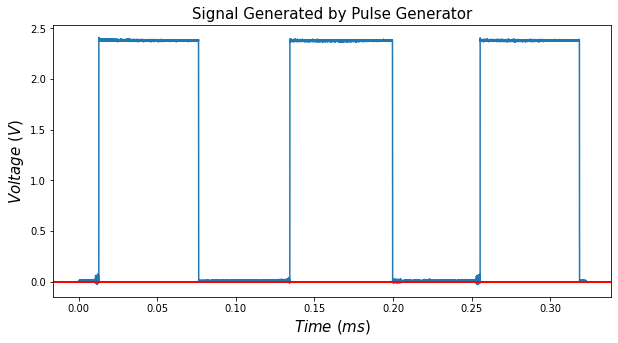

In [3]:
pulses_files_dir = './data/pulses'

#load a random file
v_pulses = ut.random_file_load(pulses_files_dir, num_samples, threshold)

#plot the loaded signal
ut.single_plot(t, v_pulses, 'Signal Generated by Pulse Generator')

In [4]:
#let's obtain the sums of the sampled pulses signals
sums = ut.signal_sum(pulses_files_dir)

print(sums)

{'./data/pulses/pulses-1.csv': 12331.040999999997, './data/pulses/pulses-10.csv': 13514.615000000002, './data/pulses/pulses-2.csv': 14129.519999999999, './data/pulses/pulses-3.csv': 14191.650999999998, './data/pulses/pulses-4.csv': 11424.214, './data/pulses/pulses-5.csv': 12884.134999999998, './data/pulses/pulses-6.csv': 12149.267, './data/pulses/pulses-7.csv': 12740.347999999998, './data/pulses/pulses-8.csv': 14193.114, './data/pulses/pulses-9.csv': 14364.149000000001}


## Pulses applied to open circuited fence
The pulses generated by the pulse generator were applied to a section of the/a fence in the/a conservancy at Dedan Kimathi University of Technology Conservancy. The section in use is approximately $106\ m$ long. The following is a visualisation of the signal at the input port of the fence.

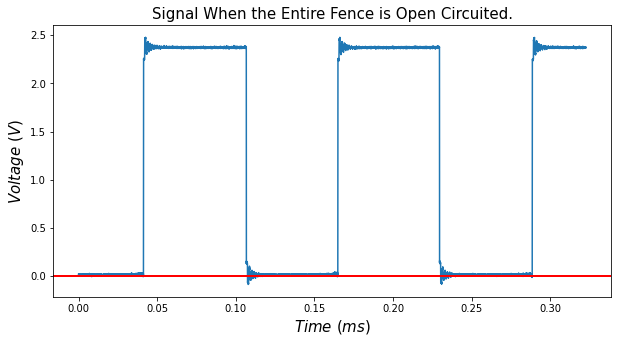

In [5]:
open_files_dir = './data/open-circuit'

#load a random file
v_open = ut.random_file_load(open_files_dir, num_samples, threshold)

#plot the loaded signal
ut.single_plot(t, v_open, 'Signal When the Entire Fence is Open Circuited.')

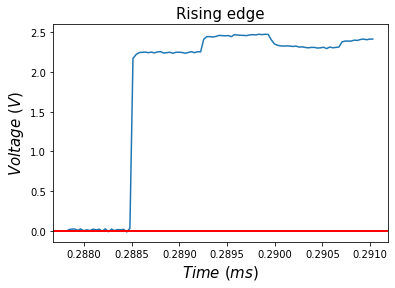

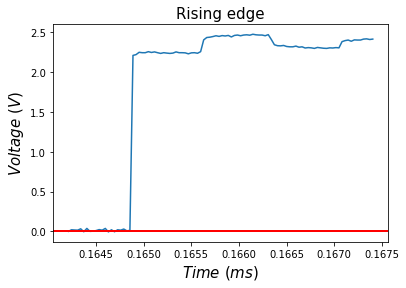

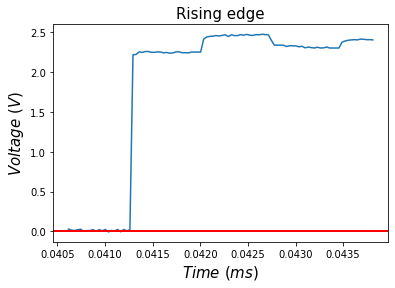

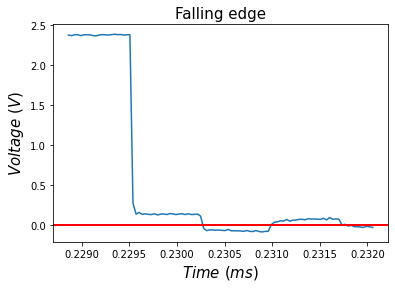

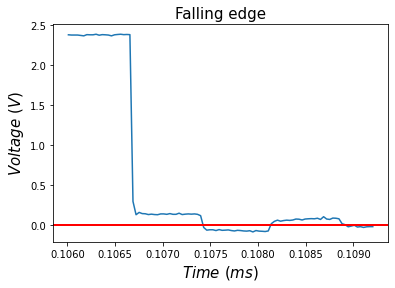

In [6]:
#locate rising and falling edges in the signal
open_edges_indices = ut.edges_detection(v_open, t, num_edges, win_size, prior_samples, overlap_threshold)

#plot rising and falling edges
ut.edges_plots(v_open, t, open_edges_indices, win_size, prior_samples)

In [7]:
#print sum of signals' sampled values
sums = ut.signal_sum(open_files_dir)

print(sums)

{'./data/open-circuit/open-106-1.csv': 11723.863, './data/open-circuit/open-106-10.csv': 12457.345, './data/open-circuit/open-106-11.csv': -8760.517000000003, './data/open-circuit/open-106-12.csv': -23779.337, './data/open-circuit/open-106-13.csv': 11847.267, './data/open-circuit/open-106-14.csv': 12863.411, './data/open-circuit/open-106-15.csv': 13341.143, './data/open-circuit/open-106-16.csv': 14239.149, './data/open-circuit/open-106-17.csv': 11314.742, './data/open-circuit/open-106-18.csv': 14598.156, './data/open-circuit/open-106-19.csv': -22999.014000000003, './data/open-circuit/open-106-2.csv': 13934.462999999998, './data/open-circuit/open-106-20.csv': -22753.984, './data/open-circuit/open-106-21.csv': 11529.428000000002, './data/open-circuit/open-106-22.csv': 13634.689000000002, './data/open-circuit/open-106-23.csv': 14227.015, './data/open-circuit/open-106-24.csv': 11247.419, './data/open-circuit/open-106-25.csv': 11760.243999999999, './data/open-circuit/open-106-26.csv': 14190

## Pulses applied to short circuited fence
The pulses generated by the pulse generator were also applied to the fence while short-circuiting it at antervals from the input point to the end. The following is a visualisation of the signals at the input port of the fence for various short circuit intervals.

### 2.46 m
Short circuit at 2.46 m from the input port

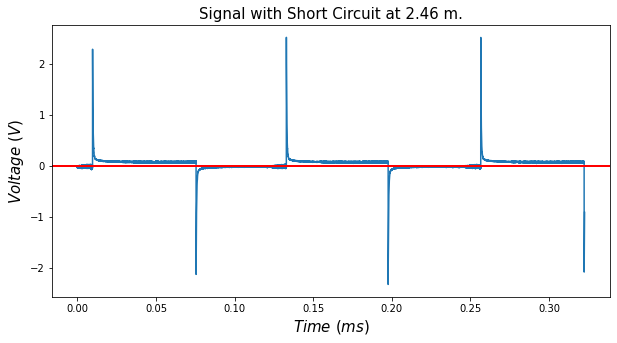

In [8]:
short_2_files_dir = './data/short-circuit/2m'

#load a random file
v_short_2 = ut.random_file_load(short_2_files_dir, num_samples, threshold)

#plot the loaded signal
ut.single_plot(t, v_short_2, 'Signal with Short Circuit at 2.46 m.')

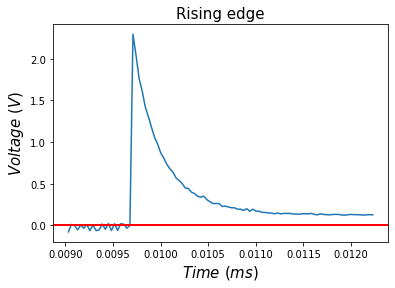

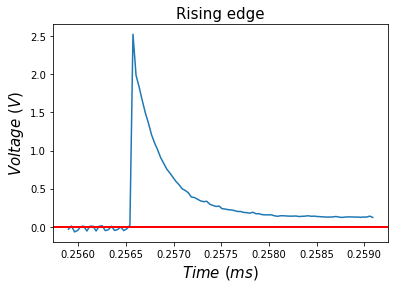

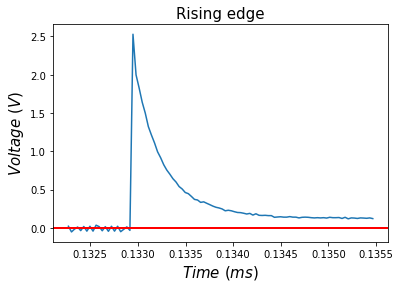

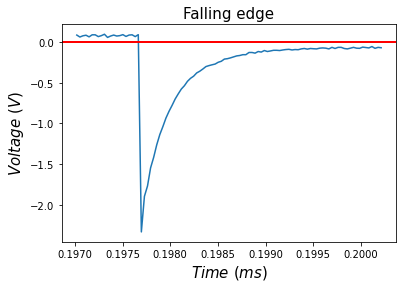

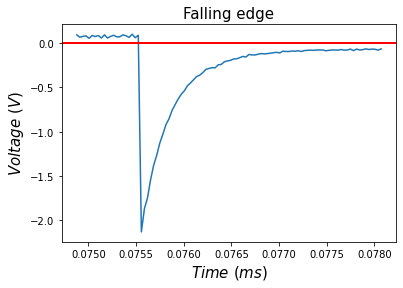

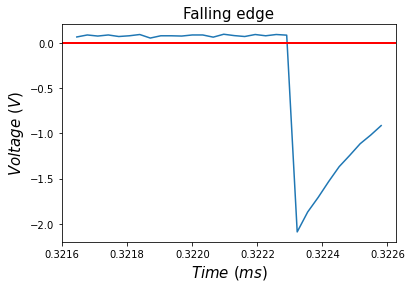

In [9]:
#locate rising and falling edges in the signal and plot
short_2_edges_indices = ut.edges_detection(v_short_2, t, num_edges, win_size, prior_samples, overlap_threshold)

#plot rising and falling edges
ut.edges_plots(v_short_2, t, short_2_edges_indices, win_size, prior_samples) 

In [10]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_2_files_dir)

print(sums)

{'./data/short-circuit/2m/short-106-2-1.csv': 237.55399999999997, './data/short-circuit/2m/short-106-2-10.csv': 234.945, './data/short-circuit/2m/short-106-2-11.csv': 327.48299999999995, './data/short-circuit/2m/short-106-2-12.csv': 339.19599999999997, './data/short-circuit/2m/short-106-2-13.csv': 224.1489999999999, './data/short-circuit/2m/short-106-2-14.csv': 370.749, './data/short-circuit/2m/short-106-2-15.csv': 362.29400000000004, './data/short-circuit/2m/short-106-2-16.csv': 233.56199999999998, './data/short-circuit/2m/short-106-2-17.csv': 339.37, './data/short-circuit/2m/short-106-2-18.csv': 228.64399999999998, './data/short-circuit/2m/short-106-2-19.csv': 259.60299999999995, './data/short-circuit/2m/short-106-2-2.csv': 425.71700000000004, './data/short-circuit/2m/short-106-2-20.csv': -22686.324000000004, './data/short-circuit/2m/short-106-2-3.csv': 282.65599999999995, './data/short-circuit/2m/short-106-2-4.csv': 258.73599999999993, './data/short-circuit/2m/short-106-2-5.csv': 41

### 5.30 m
Short circuit at 5.30 m from the input port

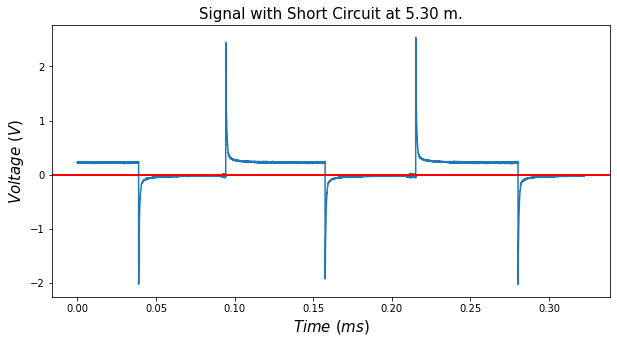

In [11]:
short_5_files_dir = './data/short-circuit/5m'

#load a random file
v_short_5 = ut.random_file_load(short_5_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_5, 'Signal with Short Circuit at 5.30 m.')

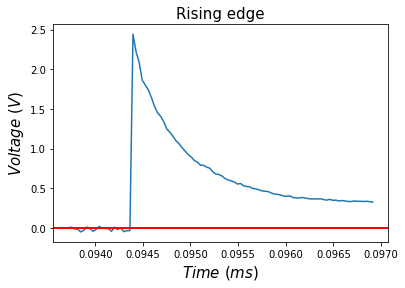

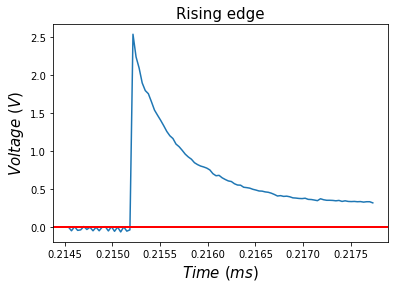

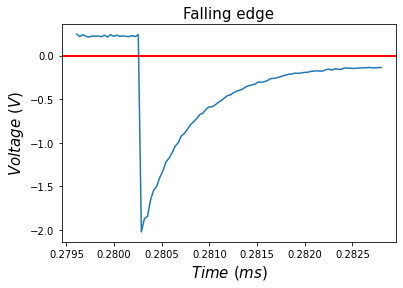

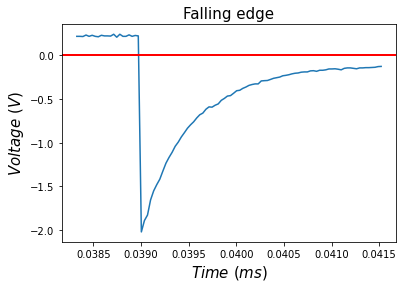

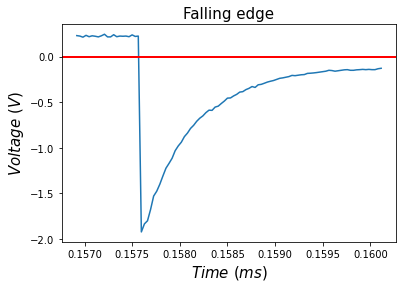

In [12]:
#locate rising and falling edges in the signal
short_5_edges_indices = ut.edges_detection(v_short_5, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_5, t, short_5_edges_indices, win_size, prior_samples)

In [13]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_5_files_dir)

print(sums)

{'./data/short-circuit/5m/short-106-5-1.csv': 866.513, './data/short-circuit/5m/short-106-5-10.csv': 908.338, './data/short-circuit/5m/short-106-5-11.csv': 924.5359999999998, './data/short-circuit/5m/short-106-5-12.csv': 1413.2540000000001, './data/short-circuit/5m/short-106-5-13.csv': 1218.8700000000001, './data/short-circuit/5m/short-106-5-14.csv': 1355.0620000000001, './data/short-circuit/5m/short-106-5-15.csv': 1212.9400000000003, './data/short-circuit/5m/short-106-5-16.csv': 1151.6840000000002, './data/short-circuit/5m/short-106-5-17.csv': 1469.246, './data/short-circuit/5m/short-106-5-18.csv': 630.6449999999998, './data/short-circuit/5m/short-106-5-19.csv': 1172.333, './data/short-circuit/5m/short-106-5-2.csv': 672.797, './data/short-circuit/5m/short-106-5-20.csv': 997.4170000000001, './data/short-circuit/5m/short-106-5-3.csv': 544.558, './data/short-circuit/5m/short-106-5-4.csv': 897.4560000000001, './data/short-circuit/5m/short-106-5-5.csv': 735.312, './data/short-circuit/5m/sh

### 8.46 m
Short circuit at 8.46 m from the input port

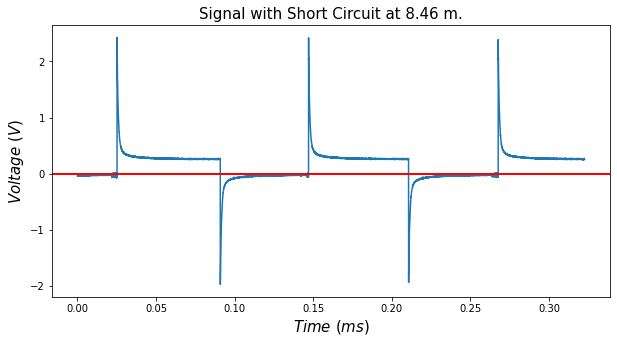

In [14]:
short_8_files_dir = './data/short-circuit/8m'

#load a random file
v_short_8 = ut.random_file_load(short_8_files_dir, num_samples, threshold)

#plot the loaded signal
ut.single_plot(t, v_short_8, 'Signal with Short Circuit at 8.46 m.')

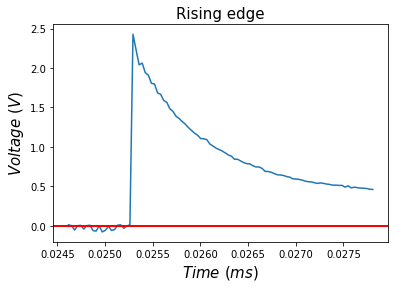

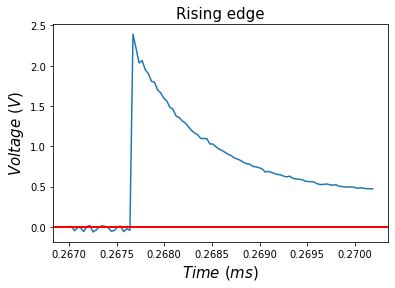

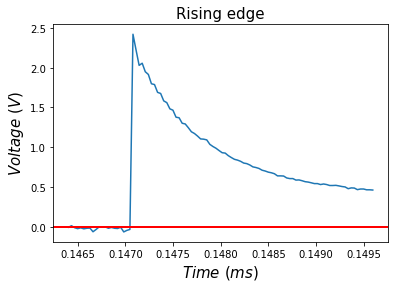

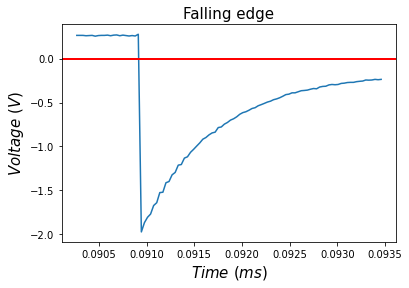

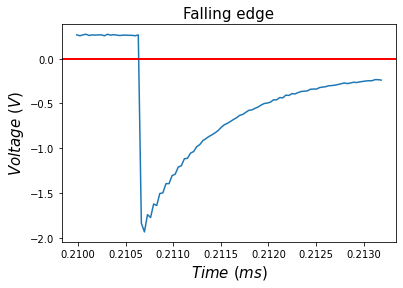

In [15]:
#locate rising and falling edges in the signal
short_8_edges_indices = ut.edges_detection(v_short_8, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_8, t, short_8_edges_indices, win_size, prior_samples)

In [16]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_8_files_dir)

print(sums)

{'./data/short-circuit/8m/short-106-8-1.csv': 1278.145, './data/short-circuit/8m/short-106-8-10.csv': 1532.288, './data/short-circuit/8m/short-106-8-11.csv': 1555.046, './data/short-circuit/8m/short-106-8-12.csv': 1460.163, './data/short-circuit/8m/short-106-8-13.csv': 1590.532, './data/short-circuit/8m/short-106-8-14.csv': 1420.6529999999998, './data/short-circuit/8m/short-106-8-15.csv': 1075.8799999999999, './data/short-circuit/8m/short-106-8-16.csv': 1438.579, './data/short-circuit/8m/short-106-8-17.csv': 1478.966, './data/short-circuit/8m/short-106-8-18.csv': 1554.6109999999999, './data/short-circuit/8m/short-106-8-19.csv': -24880.181000000004, './data/short-circuit/8m/short-106-8-2.csv': 1480.729, './data/short-circuit/8m/short-106-8-20.csv': 1319.7669999999998, './data/short-circuit/8m/short-106-8-3.csv': 1018.49, './data/short-circuit/8m/short-106-8-4.csv': 1393.537, './data/short-circuit/8m/short-106-8-5.csv': 958.767, './data/short-circuit/8m/short-106-8-6.csv': 1338.284999999

### 12.41 m
Short circuit at 12.41 m from the input port

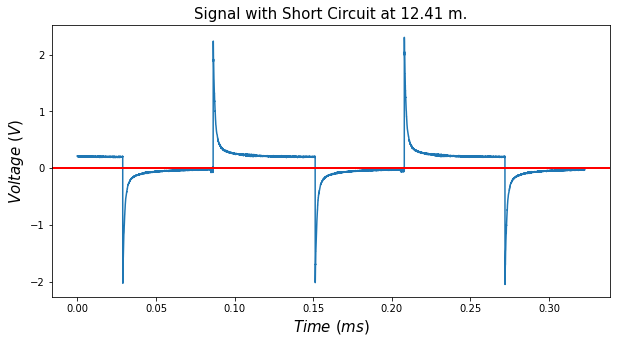

In [17]:
short_12_files_dir = './data/short-circuit/12m'


#load a random file
v_short_12 = ut.random_file_load(short_12_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_12, 'Signal with Short Circuit at 12.41 m.')

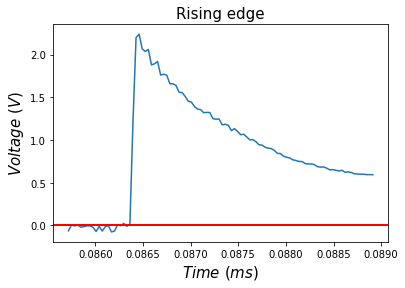

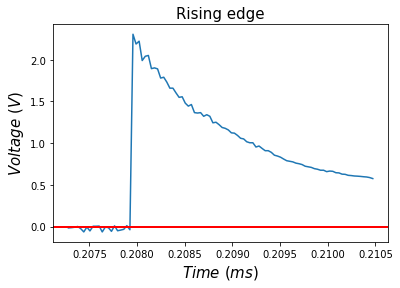

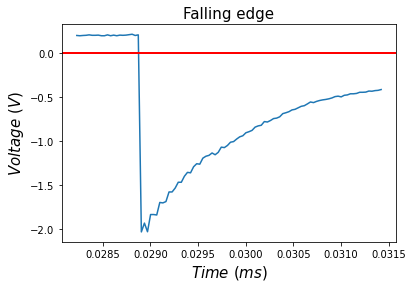

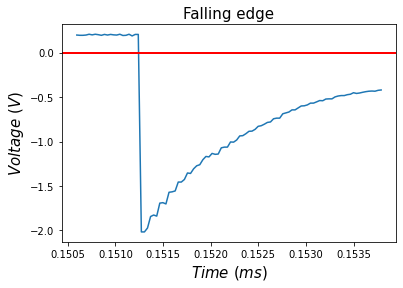

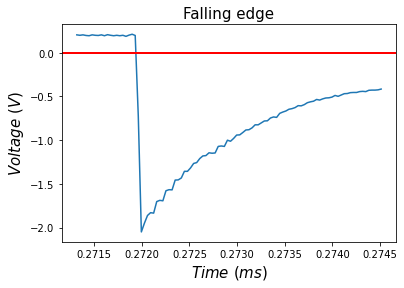

In [18]:
#locate rising and falling edges in the signal
short_12_edges_indices = ut.edges_detection(v_short_12, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_12, t, short_12_edges_indices, win_size, prior_samples)


In [19]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_12_files_dir)

print(sums)

{'./data/short-circuit/12m/short-106-12-1.csv': 1531.272, './data/short-circuit/12m/short-106-12-10.csv': 1240.374, './data/short-circuit/12m/short-106-12-11.csv': 1065.835, './data/short-circuit/12m/short-106-12-12.csv': 1067.9170000000001, './data/short-circuit/12m/short-106-12-13.csv': 1187.942, './data/short-circuit/12m/short-106-12-14.csv': 1141.9740000000002, './data/short-circuit/12m/short-106-12-15.csv': 960.0029999999999, './data/short-circuit/12m/short-106-12-16.csv': 800.6700000000001, './data/short-circuit/12m/short-106-12-17.csv': 1201.0800000000002, './data/short-circuit/12m/short-106-12-18.csv': 794.5210000000002, './data/short-circuit/12m/short-106-12-19.csv': 1078.24, './data/short-circuit/12m/short-106-12-2.csv': 695.9739999999999, './data/short-circuit/12m/short-106-12-20.csv': 771.105, './data/short-circuit/12m/short-106-12-21.csv': 1226.79, './data/short-circuit/12m/short-106-12-3.csv': 1070.8200000000002, './data/short-circuit/12m/short-106-12-4.csv': 824.441, './

### 17.44 m
Short circuit at 17.44 m from the input port

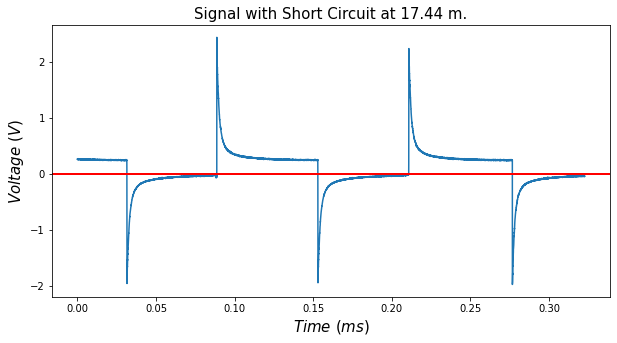

In [20]:
short_17_files_dir = './data/short-circuit/17m'


#load a random file
v_short_17 = ut.random_file_load(short_17_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_17, 'Signal with Short Circuit at 17.44 m.')

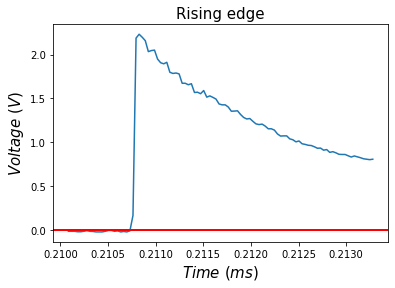

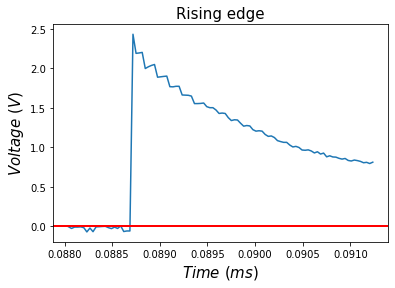

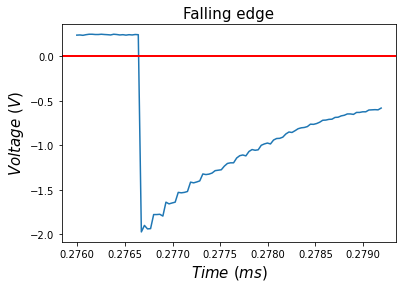

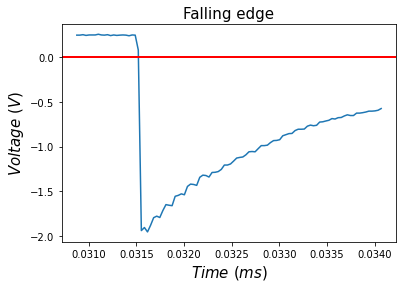

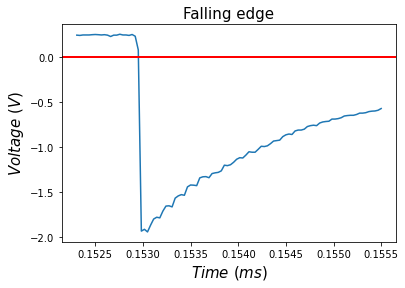

In [21]:
#locate rising and falling edges in the signal
short_17_edges_indices = ut.edges_detection(v_short_17, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_17, t, short_17_edges_indices, win_size, prior_samples)

In [22]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_17_files_dir)

print(sums)

{'./data/short-circuit/17m/short-106-17-1.csv': 1276.701, './data/short-circuit/17m/short-106-17-10.csv': 1316.189, './data/short-circuit/17m/short-106-17-11.csv': 868.7710000000002, './data/short-circuit/17m/short-106-17-12.csv': 1376.9589999999998, './data/short-circuit/17m/short-106-17-13.csv': 1252.597, './data/short-circuit/17m/short-106-17-14.csv': 891.271, './data/short-circuit/17m/short-106-17-15.csv': 1363.075, './data/short-circuit/17m/short-106-17-16.csv': 1200.155, './data/short-circuit/17m/short-106-17-17.csv': 1426.07, './data/short-circuit/17m/short-106-17-18.csv': 1475.818, './data/short-circuit/17m/short-106-17-19.csv': 1162.342, './data/short-circuit/17m/short-106-17-2.csv': 1336.219, './data/short-circuit/17m/short-106-17-20.csv': 770.714, './data/short-circuit/17m/short-106-17-21.csv': 1053.304, './data/short-circuit/17m/short-106-17-3.csv': 841.5020000000001, './data/short-circuit/17m/short-106-17-4.csv': 990.028, './data/short-circuit/17m/short-106-17-5.csv': 856.

### 22.38 m
Short circuit at 22.38 m from the input port

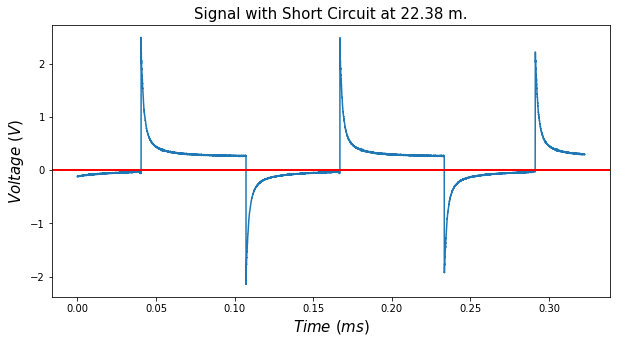

In [23]:
short_22_files_dir = './data/short-circuit/22m'


#load a random file
v_short_22 = ut.random_file_load(short_22_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_22, 'Signal with Short Circuit at 22.38 m.')


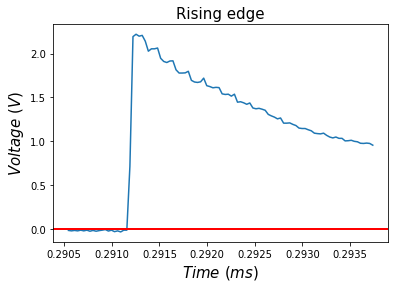

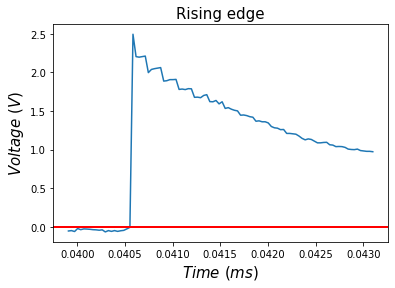

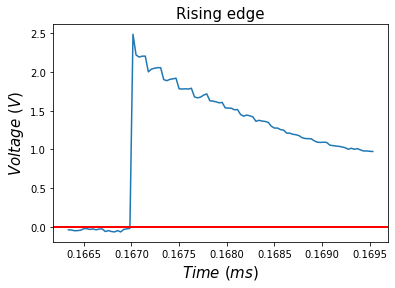

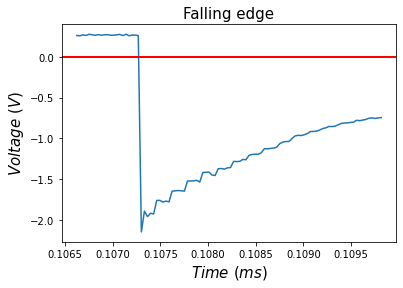

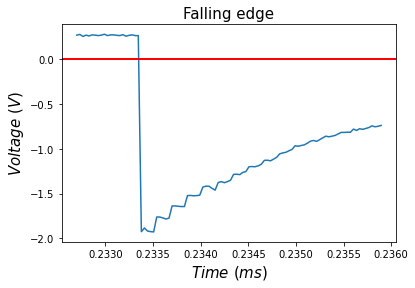

In [24]:
#locate rising and falling edges in the signal
short_22_edges_indices = ut.edges_detection(v_short_22, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_22, t, short_22_edges_indices, win_size, prior_samples)

In [25]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_22_files_dir)

print(sums)

{'./data/short-circuit/22m/short-106-22-1.csv': 1063.963, './data/short-circuit/22m/short-106-22-10.csv': 1039.297, './data/short-circuit/22m/short-106-22-11.csv': 1175.377, './data/short-circuit/22m/short-106-22-12.csv': 1352.907, './data/short-circuit/22m/short-106-22-13.csv': 770.1670000000001, './data/short-circuit/22m/short-106-22-14.csv': 1033.409, './data/short-circuit/22m/short-106-22-15.csv': 1201.012, './data/short-circuit/22m/short-106-22-16.csv': 1158.645, './data/short-circuit/22m/short-106-22-17.csv': 1202.532, './data/short-circuit/22m/short-106-22-18.csv': 775.588, './data/short-circuit/22m/short-106-22-19.csv': 1648.516, './data/short-circuit/22m/short-106-22-2.csv': 1599.0079999999998, './data/short-circuit/22m/short-106-22-20.csv': 803.4470000000003, './data/short-circuit/22m/short-106-22-21.csv': 1379.8899999999999, './data/short-circuit/22m/short-106-22-3.csv': 1378.7649999999999, './data/short-circuit/22m/short-106-22-4.csv': 971.909, './data/short-circuit/22m/sho

### 26.86 m
Short circuit at 26.86 m from the input port

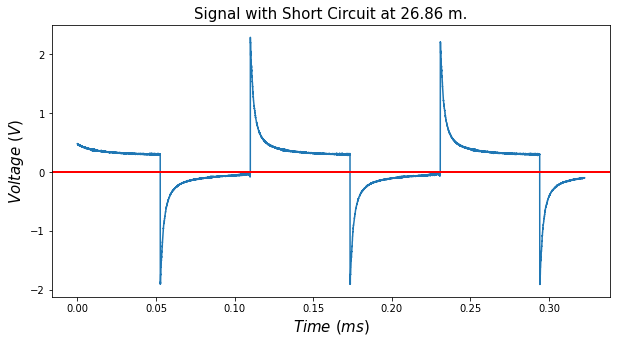

In [26]:
short_27_files_dir = './data/short-circuit/27m'


#load a random file
v_short_27 = ut.random_file_load(short_27_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_27, 'Signal with Short Circuit at 26.86 m.')

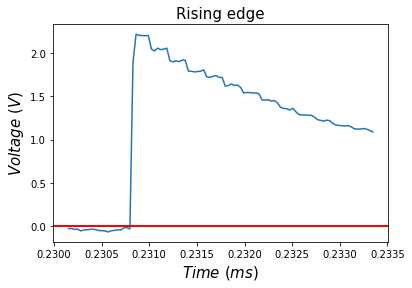

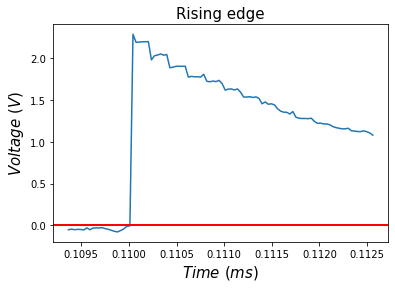

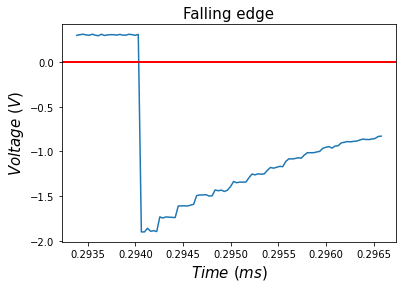

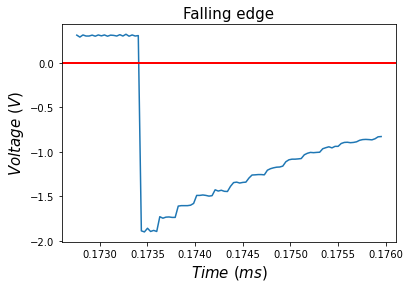

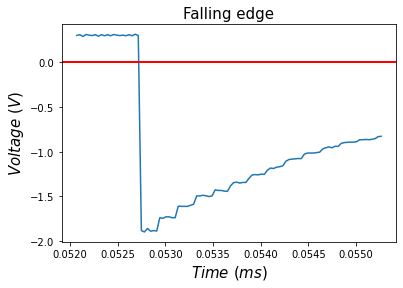

In [27]:
#locate rising and falling edges in the signal
short_27_edges_indices = ut.edges_detection(v_short_27, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_27, t, short_27_edges_indices, win_size, prior_samples)

In [28]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_27_files_dir)

print(sums)

{'./data/short-circuit/27m/short-106-26-3.csv': 1111.625, './data/short-circuit/27m/short-106-27-1.csv': 1473.9180000000001, './data/short-circuit/27m/short-106-27-10.csv': 1114.603, './data/short-circuit/27m/short-106-27-11.csv': 1629.308, './data/short-circuit/27m/short-106-27-12.csv': 1201.4920000000002, './data/short-circuit/27m/short-106-27-13.csv': 1793.299, './data/short-circuit/27m/short-106-27-14.csv': 1772.0380000000002, './data/short-circuit/27m/short-106-27-15.csv': 1164.855, './data/short-circuit/27m/short-106-27-16.csv': 1594.9740000000002, './data/short-circuit/27m/short-106-27-17.csv': 946.3809999999999, './data/short-circuit/27m/short-106-27-18.csv': 1138.188, './data/short-circuit/27m/short-106-27-19.csv': 1320.3280000000002, './data/short-circuit/27m/short-106-27-2.csv': 1010.6349999999998, './data/short-circuit/27m/short-106-27-20.csv': 1467.906, './data/short-circuit/27m/short-106-27-21.csv': 1286.223, './data/short-circuit/27m/short-106-27-4.csv': 1317.109, './dat

### 32.24 m
Short circuit at 32.24 m from the input port

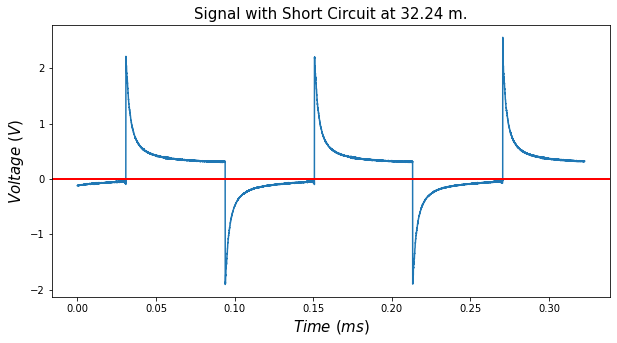

In [29]:
short_32_files_dir = './data/short-circuit/32m'


#load a random file
v_short_32 = ut.random_file_load(short_32_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_32, 'Signal with Short Circuit at 32.24 m.')

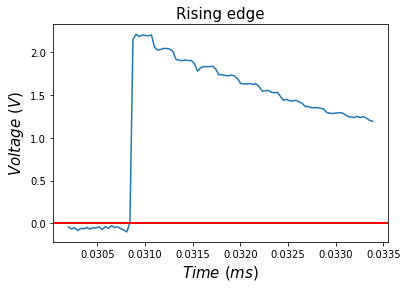

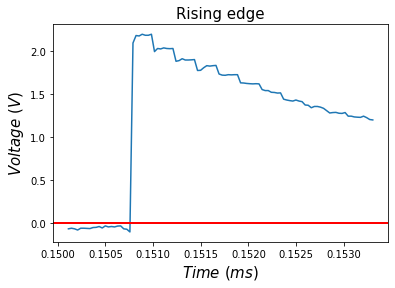

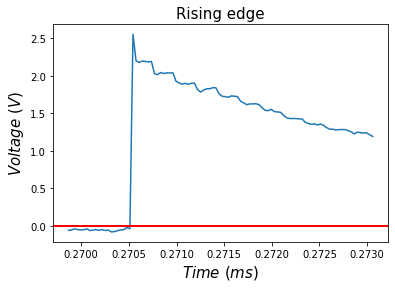

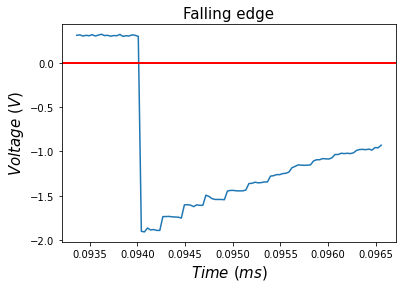

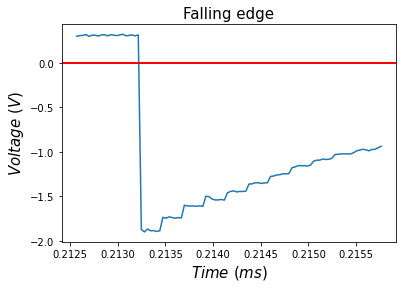

In [30]:
#locate rising and falling edges in the signal
short_32_edges_indices = ut.edges_detection(v_short_32, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_32, t, short_32_edges_indices, win_size, prior_samples)

In [31]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_32_files_dir)

print(sums)

{'./data/short-circuit/32m/short-106-32-1.csv': 1932.594, './data/short-circuit/32m/short-106-32-10.csv': 965.046, './data/short-circuit/32m/short-106-32-11.csv': 1745.512, './data/short-circuit/32m/short-106-32-12.csv': 1377.62, './data/short-circuit/32m/short-106-32-13.csv': 1217.9079999999997, './data/short-circuit/32m/short-106-32-14.csv': 1131.461, './data/short-circuit/32m/short-106-32-15.csv': 1768.5620000000001, './data/short-circuit/32m/short-106-32-16.csv': 1128.551, './data/short-circuit/32m/short-106-32-17.csv': 1689.7839999999997, './data/short-circuit/32m/short-106-32-18.csv': 1779.355, './data/short-circuit/32m/short-106-32-19.csv': 1841.7830000000001, './data/short-circuit/32m/short-106-32-2.csv': 1010.8889999999999, './data/short-circuit/32m/short-106-32-20.csv': 974.479, './data/short-circuit/32m/short-106-32-21.csv': 917.5060000000001, './data/short-circuit/32m/short-106-32-3.csv': 1385.31, './data/short-circuit/32m/short-106-32-4.csv': 1910.1549999999997, './data/sh

### 37.61 m
Short circuit at 37.61 m from the input port

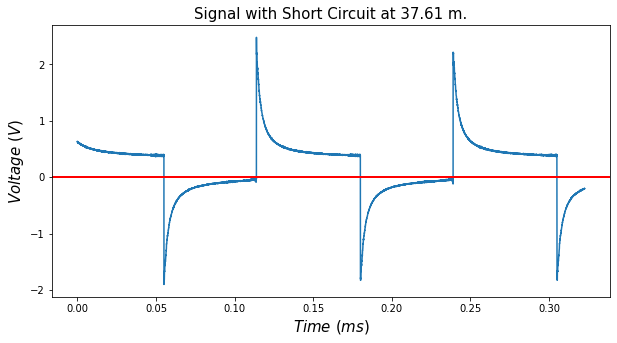

In [32]:
short_38_files_dir = './data/short-circuit/38m'


#load a random file
v_short_38 = ut.random_file_load(short_38_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_38, 'Signal with Short Circuit at 37.61 m.')

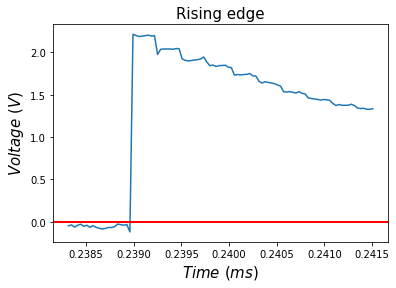

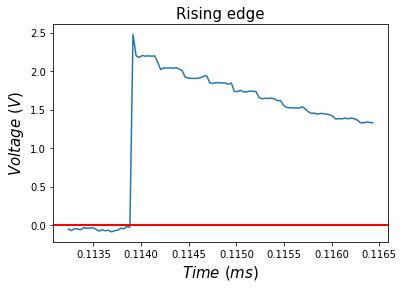

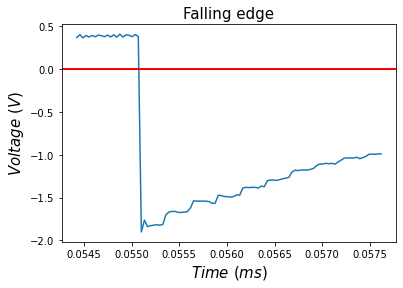

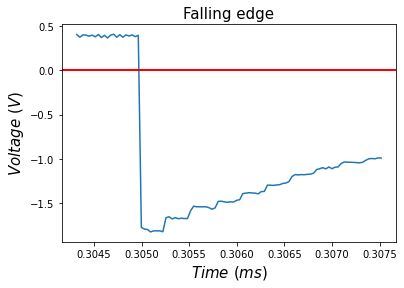

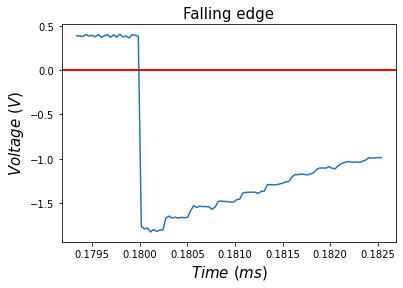

In [33]:
#locate rising and falling edges in the signal
short_38_edges_indices = ut.edges_detection(v_short_38, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_38, t, short_38_edges_indices, win_size, prior_samples)

In [34]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_38_files_dir)

print(sums)

{'./data/short-circuit/38m/short-106-38-1.csv': 2325.6169999999997, './data/short-circuit/38m/short-106-38-10.csv': 1123.6059999999998, './data/short-circuit/38m/short-106-38-11.csv': 1632.718, './data/short-circuit/38m/short-106-38-12.csv': 2293.9179999999997, './data/short-circuit/38m/short-106-38-13.csv': 1334.1869999999997, './data/short-circuit/38m/short-106-38-14.csv': 1551.9710000000002, './data/short-circuit/38m/short-106-38-15.csv': 1640.616, './data/short-circuit/38m/short-106-38-16.csv': 1519.622, './data/short-circuit/38m/short-106-38-17.csv': 2675.5699999999997, './data/short-circuit/38m/short-106-38-18.csv': 2641.448, './data/short-circuit/38m/short-106-38-19.csv': 2243.9970000000003, './data/short-circuit/38m/short-106-38-2.csv': 1306.6259999999997, './data/short-circuit/38m/short-106-38-20.csv': 1492.935, './data/short-circuit/38m/short-106-38-3.csv': 1738.134, './data/short-circuit/38m/short-106-38-4.csv': 1409.675, './data/short-circuit/38m/short-106-38-5.csv': 2323.4

### 42.15 m
Short circuit at 42.15 m from the input port

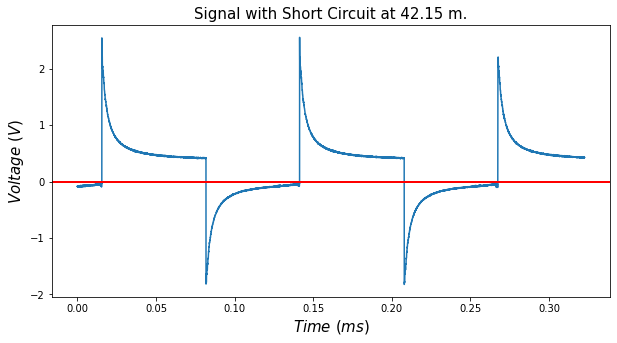

In [35]:
short_42_files_dir = './data/short-circuit/42m'


#load a random file
v_short_42 = ut.random_file_load(short_42_files_dir, num_samples, threshold)

#plot the loaded signal
ut.single_plot(t, v_short_42, 'Signal with Short Circuit at 42.15 m.')

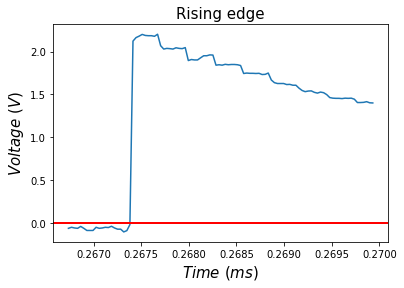

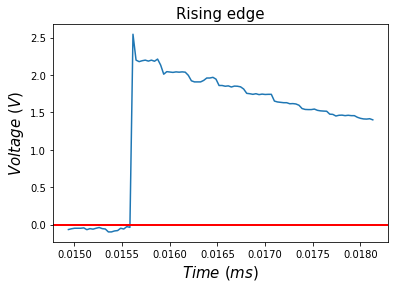

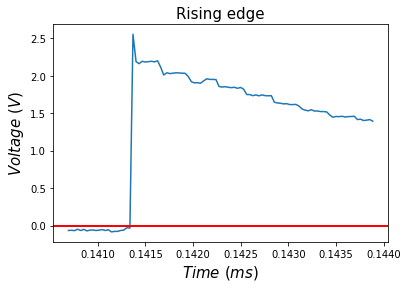

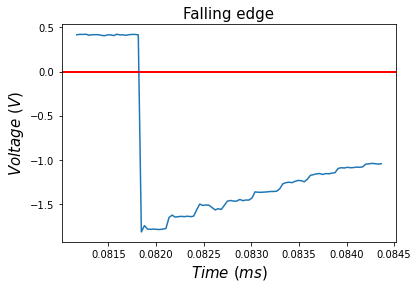

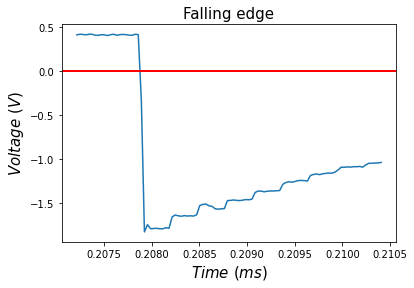

In [36]:
#locate rising and falling edges in the signal
short_42_edges_indices = ut.edges_detection(v_short_42, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_42, t, short_42_edges_indices, win_size, prior_samples)

In [37]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_42_files_dir)

print(sums)

{'./data/short-circuit/42m/short-106-42-1.csv': 2182.627, './data/short-circuit/42m/short-106-42-10.csv': 2021.008, './data/short-circuit/42m/short-106-42-11.csv': 1550.1940000000002, './data/short-circuit/42m/short-106-42-12.csv': -25255.941000000006, './data/short-circuit/42m/short-106-42-13.csv': 1863.7330000000002, './data/short-circuit/42m/short-106-42-14.csv': 1441.1770000000001, './data/short-circuit/42m/short-106-42-15.csv': 1502.39, './data/short-circuit/42m/short-106-42-16.csv': 1209.875, './data/short-circuit/42m/short-106-42-17.csv': 1855.1599999999999, './data/short-circuit/42m/short-106-42-18.csv': 1434.913, './data/short-circuit/42m/short-106-42-19.csv': 1543.144, './data/short-circuit/42m/short-106-42-2.csv': 1389.5569999999998, './data/short-circuit/42m/short-106-42-20.csv': 1924.5539999999999, './data/short-circuit/42m/short-106-42-21.csv': 2330.949, './data/short-circuit/42m/short-106-42-3.csv': 2230.7259999999997, './data/short-circuit/42m/short-106-42-4.csv': -2548

### 47.35 m
Short circuit at 47.35 m from the input port

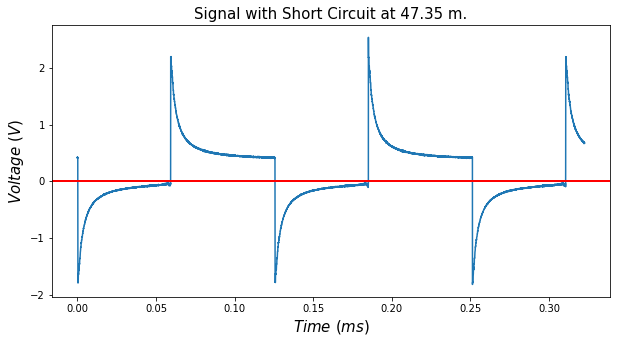

In [38]:
short_47_files_dir = './data/short-circuit/47m'

#load a random file
v_short_47 = ut.random_file_load(short_42_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_47, 'Signal with Short Circuit at 47.35 m.')

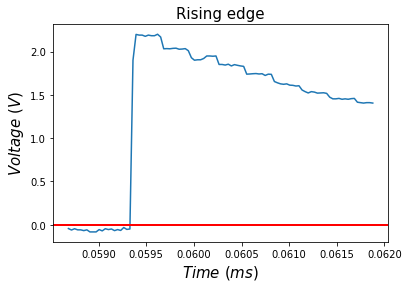

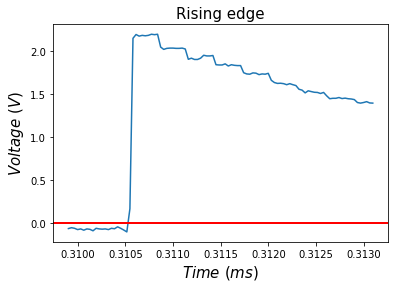

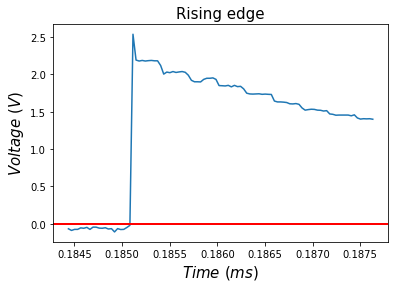

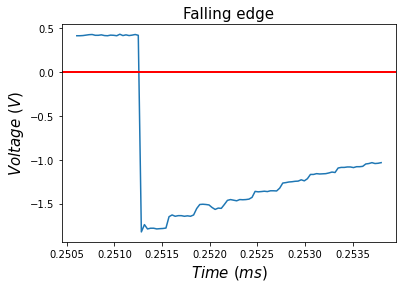

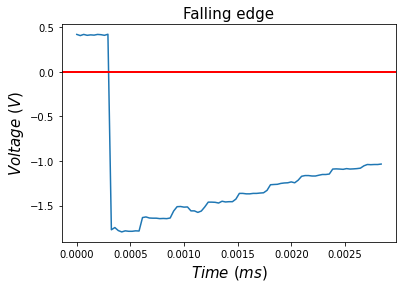

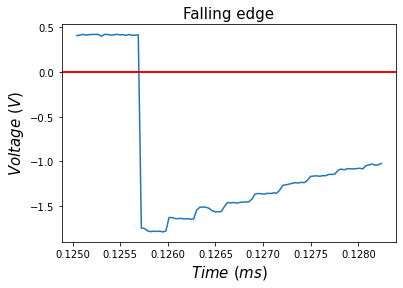

In [39]:
#locate rising and falling edges in the signal
short_47_edges_indices = ut.edges_detection(v_short_47, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_47, t, short_47_edges_indices, win_size, prior_samples)

In [40]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_47_files_dir)

print(sums)

{'./data/short-circuit/47m/short-106-46-4.csv': 2131.085, './data/short-circuit/47m/short-106-47-1.csv': 2777.962, './data/short-circuit/47m/short-106-47-10.csv': 2616.036, './data/short-circuit/47m/short-106-47-11.csv': 2610.258, './data/short-circuit/47m/short-106-47-12.csv': 2818.0370000000003, './data/short-circuit/47m/short-106-47-13.csv': -25214.575, './data/short-circuit/47m/short-106-47-14.csv': 2101.86, './data/short-circuit/47m/short-106-47-15.csv': 2134.6899999999996, './data/short-circuit/47m/short-106-47-16.csv': 2366.6810000000005, './data/short-circuit/47m/short-106-47-17.csv': 2179.263, './data/short-circuit/47m/short-106-47-18.csv': 2338.857, './data/short-circuit/47m/short-106-47-19.csv': -24938.941000000003, './data/short-circuit/47m/short-106-47-2.csv': 1659.6179999999997, './data/short-circuit/47m/short-106-47-20.csv': 2653.69, './data/short-circuit/47m/short-106-47-21.csv': 1490.0520000000001, './data/short-circuit/47m/short-106-47-22.csv': 1899.196, './data/short

### 52.08 m
Short circuit at 52.08 m from the input port

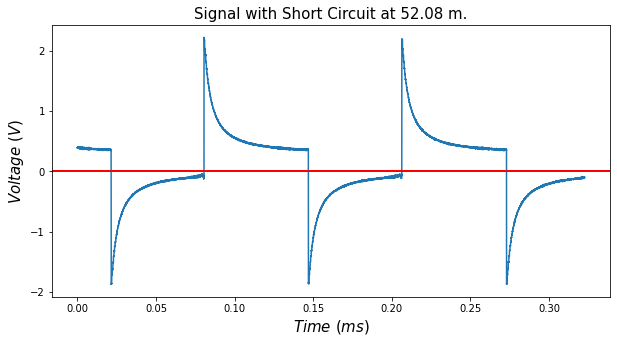

In [41]:
short_52_files_dir = './data/short-circuit/52m'


#load a random file
v_short_52 = ut.random_file_load(short_52_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_52, 'Signal with Short Circuit at 52.08 m.')

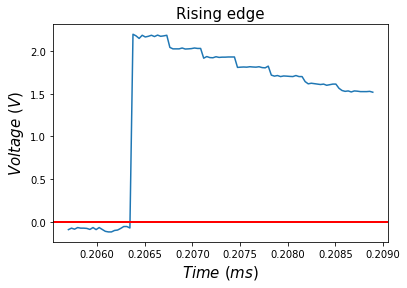

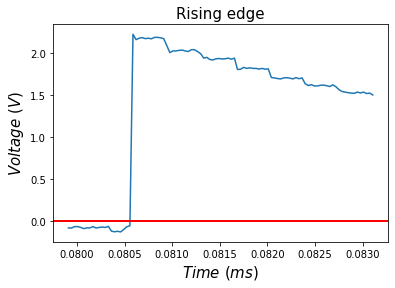

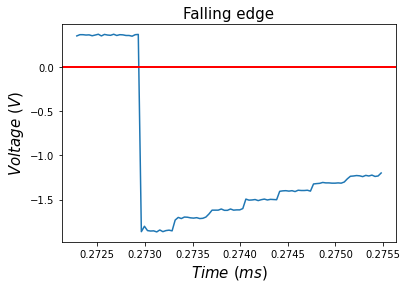

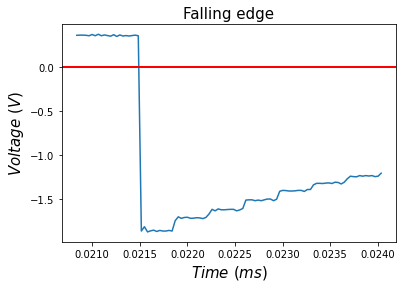

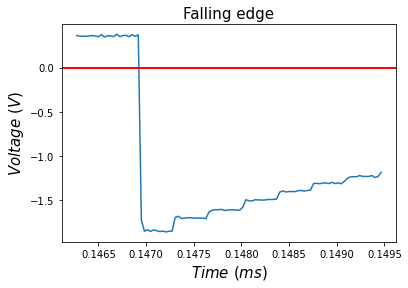

In [42]:
#locate rising and falling edges in the signal
short_52_edges_indices = ut.edges_detection(v_short_52, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_52, t, short_52_edges_indices, win_size, prior_samples)

In [43]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_52_files_dir)

print(sums)

{'./data/short-circuit/52m/short-106-52-1.csv': 1225.513, './data/short-circuit/52m/short-106-52-10.csv': 877.3640000000001, './data/short-circuit/52m/short-106-52-11.csv': 2054.419, './data/short-circuit/52m/short-106-52-12.csv': -10920.776, './data/short-circuit/52m/short-106-52-13.csv': 1205.654, './data/short-circuit/52m/short-106-52-14.csv': 859.43, './data/short-circuit/52m/short-106-52-15.csv': -25254.333, './data/short-circuit/52m/short-106-52-16.csv': 1025.2479999999998, './data/short-circuit/52m/short-106-52-17.csv': 1939.609, './data/short-circuit/52m/short-106-52-18.csv': 736.4560000000001, './data/short-circuit/52m/short-106-52-19.csv': 1942.788, './data/short-circuit/52m/short-106-52-2.csv': 902.7419999999997, './data/short-circuit/52m/short-106-52-20.csv': 1603.7359999999999, './data/short-circuit/52m/short-106-52-21.csv': 1362.616, './data/short-circuit/52m/short-106-52-3.csv': 1618.215, './data/short-circuit/52m/short-106-52-4.csv': 1525.5430000000001, './data/short-ci

### 57.08 m
Short circuit at 57.08 m from the input port

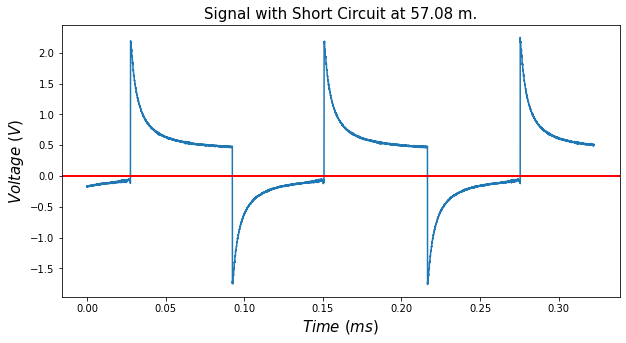

In [44]:
short_57_files_dir = './data/short-circuit/57m'


#load a random file
v_short_57 = ut.random_file_load(short_57_files_dir, num_samples, threshold)

#plot the loaded signal
ut.single_plot(t, v_short_57, 'Signal with Short Circuit at 57.08 m.')

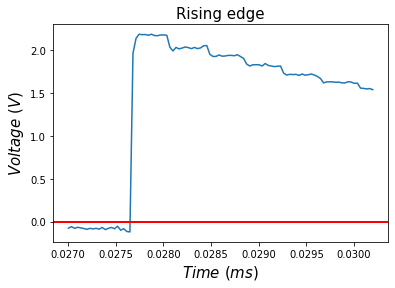

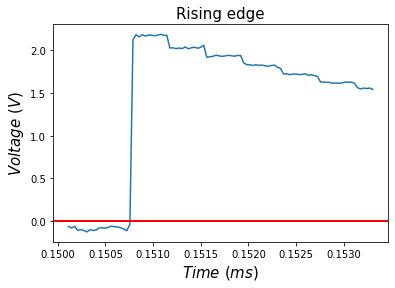

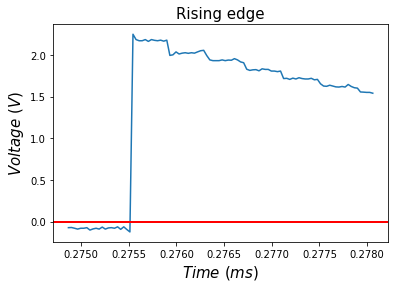

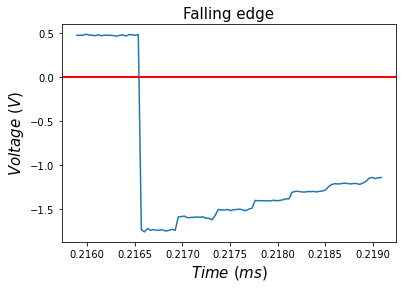

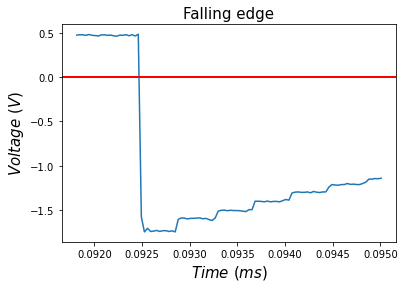

In [45]:
#locate rising and falling edges in the signal
short_57_edges_indices = ut.edges_detection(v_short_57, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_57, t, short_57_edges_indices, win_size, prior_samples)

In [46]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_57_files_dir)

print(sums)

{'./data/short-circuit/57m/short-106-57-1.csv': 2590.194, './data/short-circuit/57m/short-106-57-10.csv': 2441.1530000000002, './data/short-circuit/57m/short-106-57-11.csv': 3036.91, './data/short-circuit/57m/short-106-57-12.csv': 2650.8199999999997, './data/short-circuit/57m/short-106-57-13.csv': 2694.978, './data/short-circuit/57m/short-106-57-14.csv': 2589.452, './data/short-circuit/57m/short-106-57-15.csv': 1433.835, './data/short-circuit/57m/short-106-57-16.csv': 2580.868, './data/short-circuit/57m/short-106-57-17.csv': 1620.2710000000002, './data/short-circuit/57m/short-106-57-18.csv': 1924.3199999999997, './data/short-circuit/57m/short-106-57-19.csv': 2672.1800000000003, './data/short-circuit/57m/short-106-57-2.csv': 2060.5060000000003, './data/short-circuit/57m/short-106-57-20.csv': 2840.308, './data/short-circuit/57m/short-106-57-21.csv': 2341.3770000000004, './data/short-circuit/57m/short-106-57-22.csv': 1262.7629999999997, './data/short-circuit/57m/short-106-57-3.csv': 2574.

### 62.05 m
Short circuit at 62.05 m from the input port

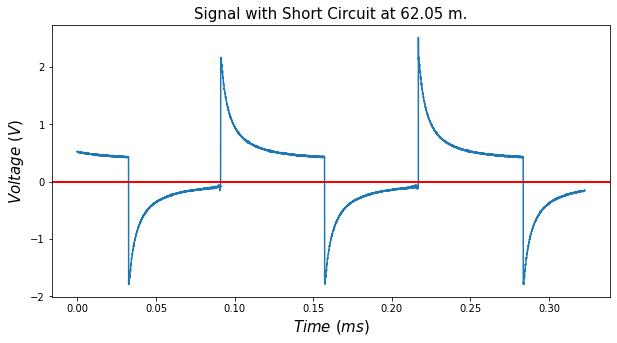

In [47]:
short_62_files_dir = './data/short-circuit/62m'


#load a random file
v_short_62 = ut.random_file_load(short_62_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_62, 'Signal with Short Circuit at 62.05 m.')

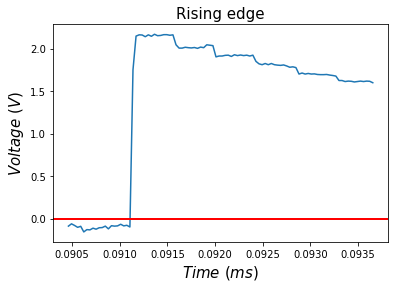

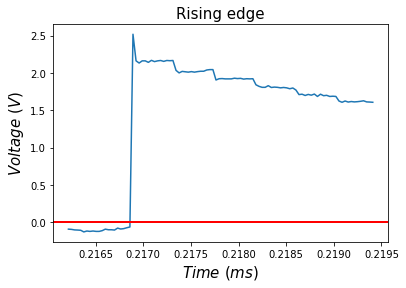

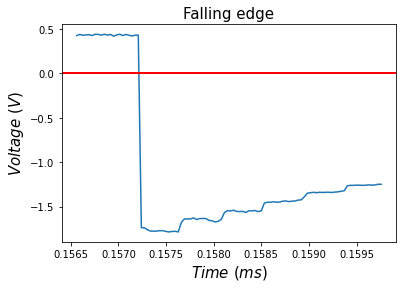

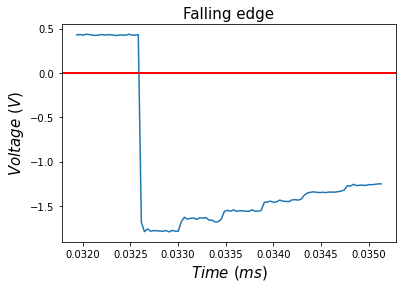

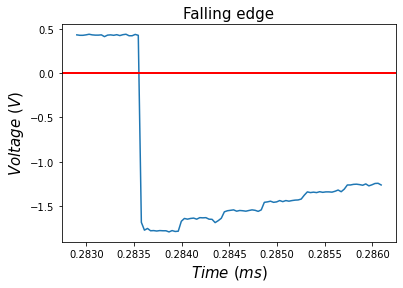

In [48]:
#locate rising and falling edges in the signal
short_62_edges_indices = ut.edges_detection(v_short_62, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_62, t, short_62_edges_indices, win_size, prior_samples)

In [49]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_62_files_dir)

print(sums)

{'./data/short-circuit/62m/short-106-62-1.csv': 1397.5119999999995, './data/short-circuit/62m/short-106-62-10.csv': 1862.185, './data/short-circuit/62m/short-106-62-11.csv': 2247.88, './data/short-circuit/62m/short-106-62-12.csv': 2715.26, './data/short-circuit/62m/short-106-62-13.csv': 2676.008, './data/short-circuit/62m/short-106-62-14.csv': 1738.257, './data/short-circuit/62m/short-106-62-15.csv': 2055.4799999999996, './data/short-circuit/62m/short-106-62-16.csv': 2279.785, './data/short-circuit/62m/short-106-62-17.csv': 1795.7060000000001, './data/short-circuit/62m/short-106-62-18.csv': 1774.7340000000002, './data/short-circuit/62m/short-106-62-19.csv': 1612.1000000000004, './data/short-circuit/62m/short-106-62-2.csv': 2760.862, './data/short-circuit/62m/short-106-62-20.csv': 2546.685, './data/short-circuit/62m/short-106-62-21.csv': 1227.44, './data/short-circuit/62m/short-106-62-22.csv': 1339.159, './data/short-circuit/62m/short-106-62-3.csv': 2602.222, './data/short-circuit/62m/s

### 66.93 m
Short circuit at 66.93 m from the input port

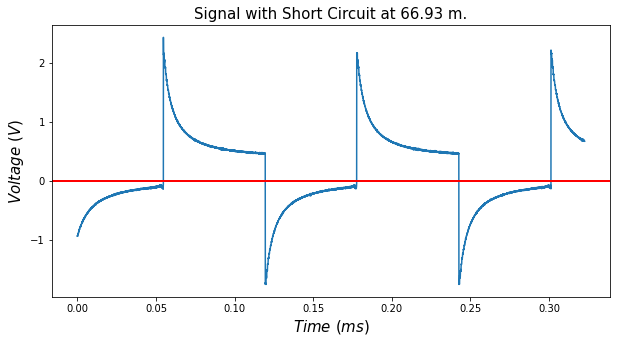

In [50]:
short_67_files_dir = './data/short-circuit/67m'


#load a random file
v_short_67 = ut.random_file_load(short_67_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_67, 'Signal with Short Circuit at 66.93 m.')

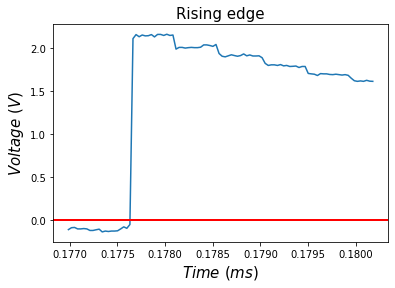

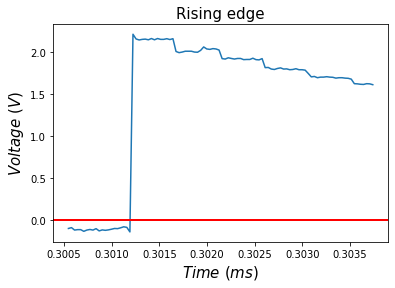

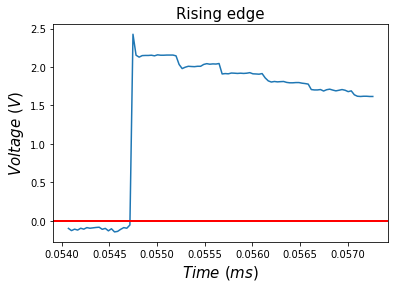

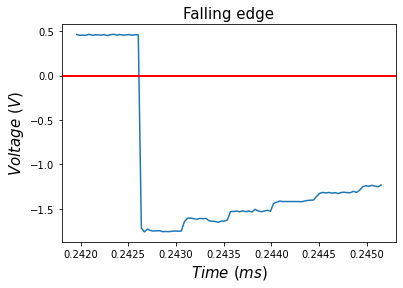

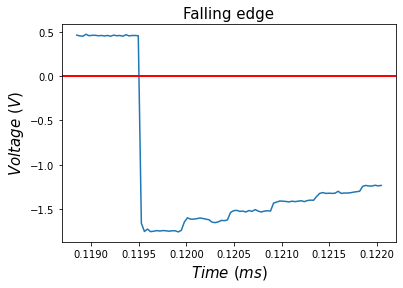

In [51]:
#locate rising and falling edges in the signal
short_67_edges_indices = ut.edges_detection(v_short_67, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_67, t, short_67_edges_indices, win_size, prior_samples)

In [52]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_67_files_dir)

print(sums)

{'./data/short-circuit/67m/short-106-67-1.csv': 1264.665, './data/short-circuit/67m/short-106-67-10.csv': 1147.1750000000004, './data/short-circuit/67m/short-106-67-11.csv': 2793.1330000000003, './data/short-circuit/67m/short-106-67-12.csv': 1398.63, './data/short-circuit/67m/short-106-67-13.csv': 2176.1929999999998, './data/short-circuit/67m/short-106-67-14.csv': 2187.553, './data/short-circuit/67m/short-106-67-15.csv': 2729.7, './data/short-circuit/67m/short-106-67-16.csv': 2543.9300000000003, './data/short-circuit/67m/short-106-67-17.csv': 1827.373, './data/short-circuit/67m/short-106-67-18.csv': 2558.7309999999998, './data/short-circuit/67m/short-106-67-19.csv': 2698.2870000000003, './data/short-circuit/67m/short-106-67-2.csv': 1725.498, './data/short-circuit/67m/short-106-67-20.csv': 1414.7499999999998, './data/short-circuit/67m/short-106-67-21.csv': 2593.735, './data/short-circuit/67m/short-106-67-3.csv': 2470.6269999999995, './data/short-circuit/67m/short-106-67-4.csv': 1145.132

### 72.10 m
Short circuit at 72.10 m from the input port

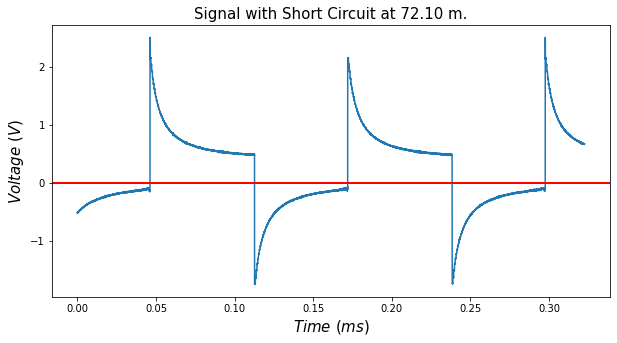

In [53]:
short_72_files_dir = './data/short-circuit/72m'


#load a random file
v_short_72 = ut.random_file_load(short_72_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_72, 'Signal with Short Circuit at 72.10 m.')

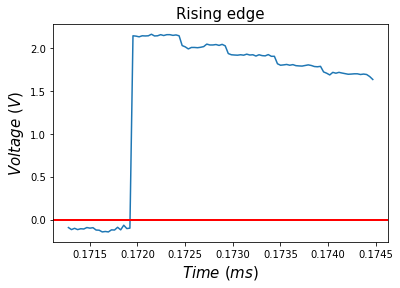

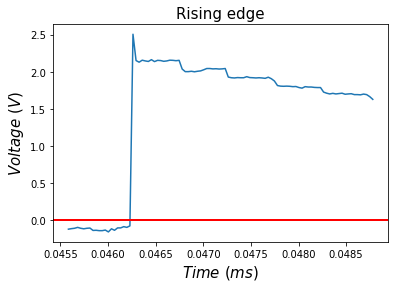

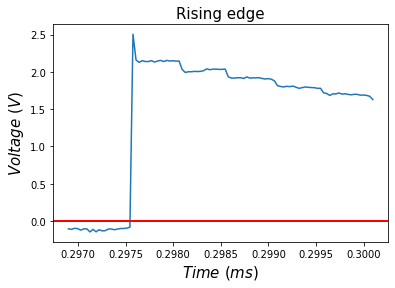

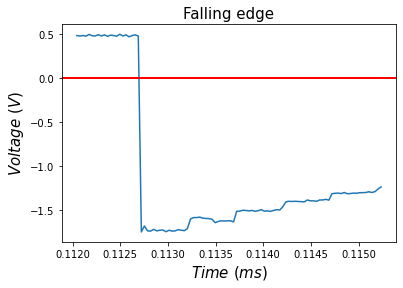

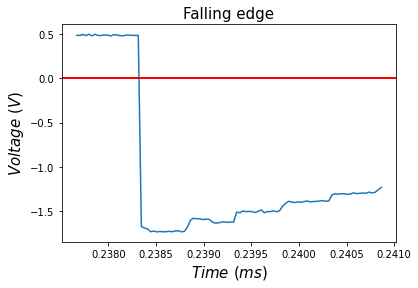

In [54]:
#locate rising and falling edges in the signal
short_72_edges_indices = ut.edges_detection(v_short_72, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_72, t, short_72_edges_indices, win_size, prior_samples)

In [55]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_72_files_dir)

print(sums)

{'./data/short-circuit/72m/short-106-72-1.csv': 1396.878, './data/short-circuit/72m/short-106-72-10.csv': 2222.8709999999996, './data/short-circuit/72m/short-106-72-11.csv': 1457.6880000000003, './data/short-circuit/72m/short-106-72-12.csv': 2111.243, './data/short-circuit/72m/short-106-72-13.csv': -25146.728, './data/short-circuit/72m/short-106-72-14.csv': 2665.8219999999997, './data/short-circuit/72m/short-106-72-15.csv': 1621.18, './data/short-circuit/72m/short-106-72-16.csv': 2503.131, './data/short-circuit/72m/short-106-72-17.csv': 1245.0559999999998, './data/short-circuit/72m/short-106-72-18.csv': 2747.5460000000003, './data/short-circuit/72m/short-106-72-19.csv': 2946.6380000000004, './data/short-circuit/72m/short-106-72-2.csv': 1795.9100000000003, './data/short-circuit/72m/short-106-72-20.csv': 2910.291, './data/short-circuit/72m/short-106-72-3.csv': 1965.025, './data/short-circuit/72m/short-106-72-4.csv': 1535.9589999999998, './data/short-circuit/72m/short-106-72-5.csv': 3101.

### 77.00 m
Short circuit at 77.00 m from the input port

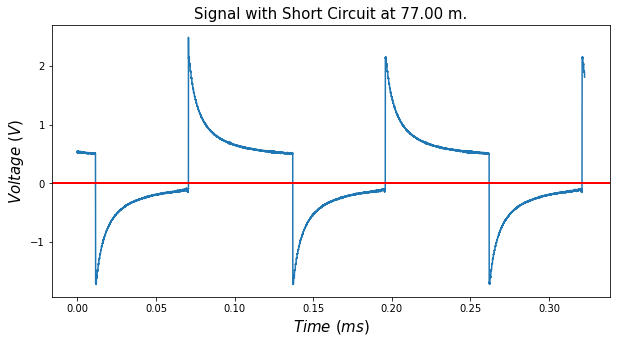

In [56]:
short_77_files_dir = './data/short-circuit/77m'


#load a random file
v_short_77 = ut.random_file_load(short_77_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_77, 'Signal with Short Circuit at 77.00 m.')

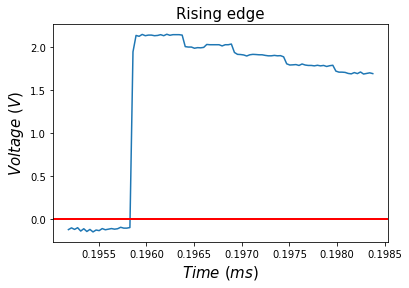

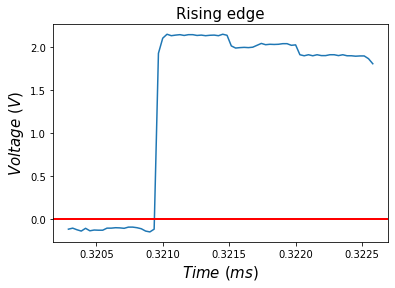

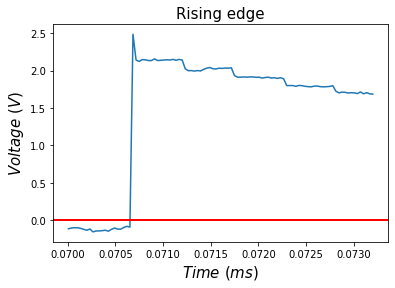

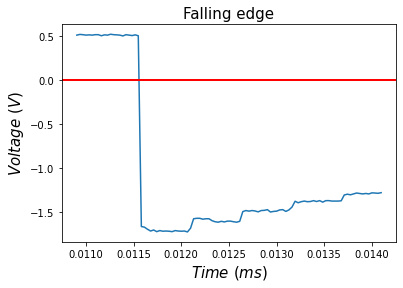

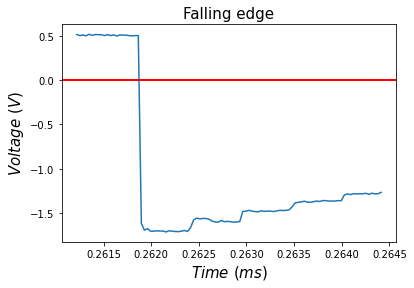

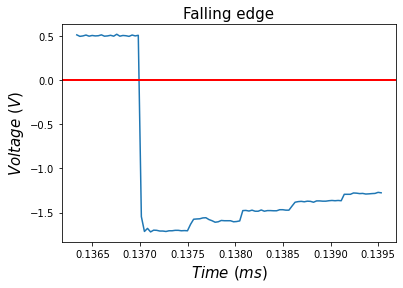

In [57]:
#locate rising and falling edges in the signal
short_77_edges_indices = ut.edges_detection(v_short_77, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_77, t, short_77_edges_indices, win_size, prior_samples)

In [58]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_77_files_dir)

print(sums)

{'./data/short-circuit/77m/short-106-77-1.csv': 1233.548, './data/short-circuit/77m/short-106-77-10.csv': -25573.599000000006, './data/short-circuit/77m/short-106-77-11.csv': 1236.7210000000002, './data/short-circuit/77m/short-106-77-12.csv': 2579.9079999999994, './data/short-circuit/77m/short-106-77-13.csv': 1269.3860000000002, './data/short-circuit/77m/short-106-77-14.csv': 2907.145, './data/short-circuit/77m/short-106-77-15.csv': 2478.6810000000005, './data/short-circuit/77m/short-106-77-16.csv': 2092.141, './data/short-circuit/77m/short-106-77-17.csv': 1675.6100000000001, './data/short-circuit/77m/short-106-77-18.csv': -25295.217000000004, './data/short-circuit/77m/short-106-77-19.csv': 2904.58, './data/short-circuit/77m/short-106-77-2.csv': 1567.8280000000002, './data/short-circuit/77m/short-106-77-20.csv': 1420.136, './data/short-circuit/77m/short-106-77-21.csv': 2255.291, './data/short-circuit/77m/short-106-77-3.csv': 2429.8720000000003, './data/short-circuit/77m/short-106-77-4.

### 82.03m
Short circuit at 82.03 m from the input port

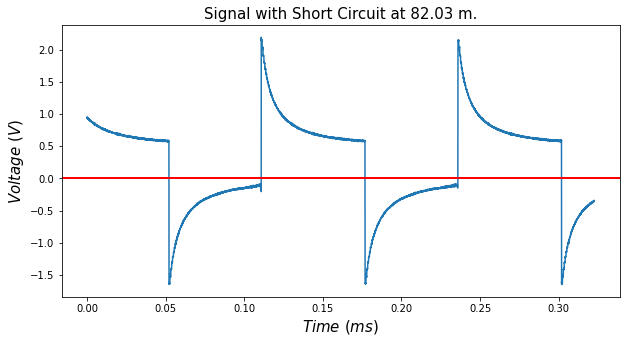

In [59]:
short_82_files_dir = './data/short-circuit/82m'


#load a random file
v_short_82 = ut.random_file_load(short_82_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_82, 'Signal with Short Circuit at 82.03 m.')

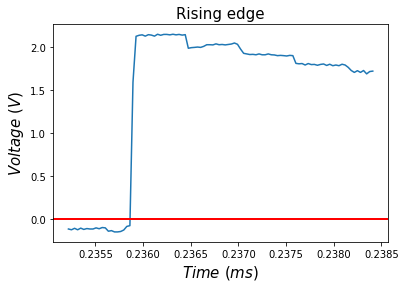

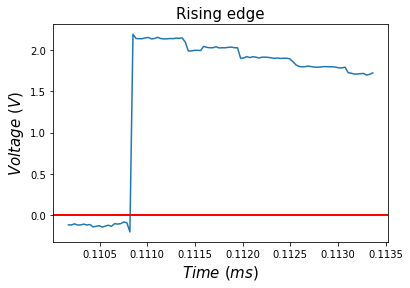

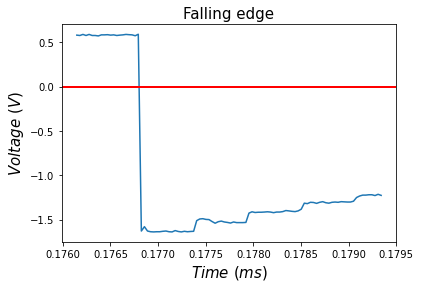

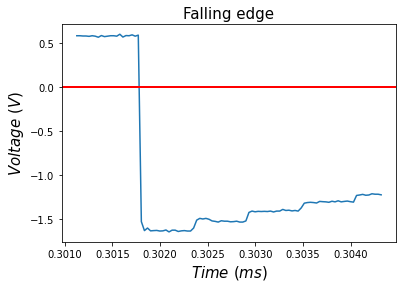

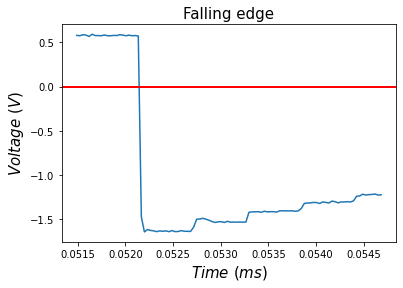

In [60]:
#locate rising and falling edges in the signal
short_82_edges_indices = ut.edges_detection(v_short_82, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_82, t, short_82_edges_indices, win_size, prior_samples)

In [61]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_22_files_dir)

print(sums)

{'./data/short-circuit/22m/short-106-22-1.csv': 1063.963, './data/short-circuit/22m/short-106-22-10.csv': 1039.297, './data/short-circuit/22m/short-106-22-11.csv': 1175.377, './data/short-circuit/22m/short-106-22-12.csv': 1352.907, './data/short-circuit/22m/short-106-22-13.csv': 770.1670000000001, './data/short-circuit/22m/short-106-22-14.csv': 1033.409, './data/short-circuit/22m/short-106-22-15.csv': 1201.012, './data/short-circuit/22m/short-106-22-16.csv': 1158.645, './data/short-circuit/22m/short-106-22-17.csv': 1202.532, './data/short-circuit/22m/short-106-22-18.csv': 775.588, './data/short-circuit/22m/short-106-22-19.csv': 1648.516, './data/short-circuit/22m/short-106-22-2.csv': 1599.0079999999998, './data/short-circuit/22m/short-106-22-20.csv': 803.4470000000003, './data/short-circuit/22m/short-106-22-21.csv': 1379.8899999999999, './data/short-circuit/22m/short-106-22-3.csv': 1378.7649999999999, './data/short-circuit/22m/short-106-22-4.csv': 971.909, './data/short-circuit/22m/sho

### 87.52 m
Short circuit at 87.52 m from the input port

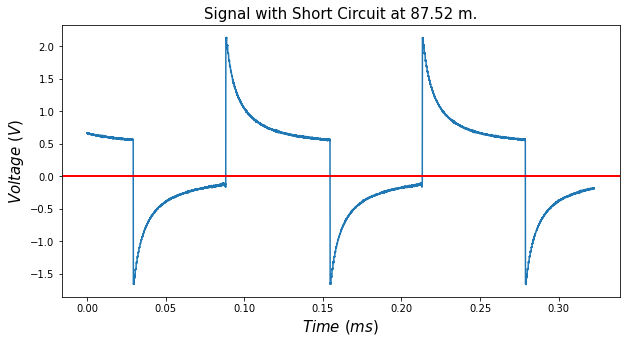

In [62]:
short_88_files_dir = './data/short-circuit/88m'


#load a random file
v_short_88 = ut.random_file_load(short_88_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_88, 'Signal with Short Circuit at 87.52 m.')

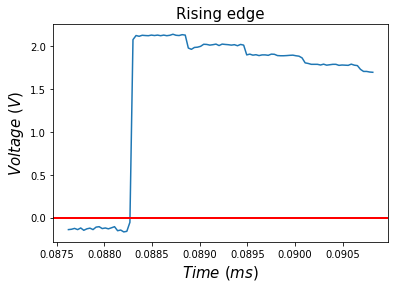

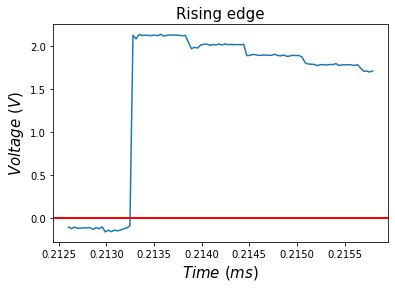

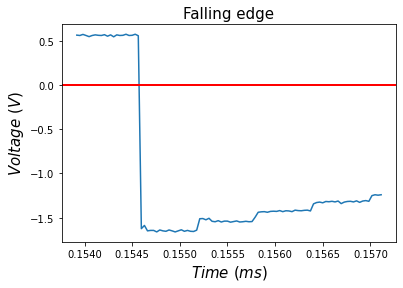

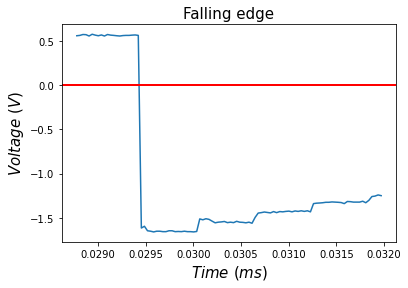

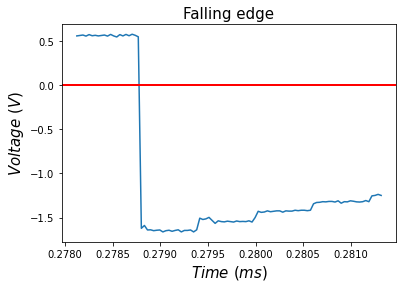

In [63]:
#locate rising and falling edges in the signal
short_88_edges_indices = ut.edges_detection(v_short_88, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_88, t, short_88_edges_indices, win_size, prior_samples)

In [64]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_88_files_dir)

print(sums)

{'./data/short-circuit/88m/short-106-88-1.csv': 3365.0509999999995, './data/short-circuit/88m/short-106-88-10.csv': 3028.6010000000006, './data/short-circuit/88m/short-106-88-11.csv': 2468.426, './data/short-circuit/88m/short-106-88-12.csv': -25341.291000000005, './data/short-circuit/88m/short-106-88-13.csv': 2810.193, './data/short-circuit/88m/short-106-88-14.csv': 1843.9479999999999, './data/short-circuit/88m/short-106-88-15.csv': 2684.0579999999995, './data/short-circuit/88m/short-106-88-16.csv': 2332.583, './data/short-circuit/88m/short-106-88-17.csv': 2946.3, './data/short-circuit/88m/short-106-88-18.csv': 2113.3849999999998, './data/short-circuit/88m/short-106-88-19.csv': 3558.112, './data/short-circuit/88m/short-106-88-2.csv': 1433.5609999999995, './data/short-circuit/88m/short-106-88-20.csv': 2320.9709999999995, './data/short-circuit/88m/short-106-88-21.csv': 1735.1720000000005, './data/short-circuit/88m/short-106-88-3.csv': 3112.006, './data/short-circuit/88m/short-106-88-4.cs

### 93.26 m
Short circuit at 93.26 m from the input port

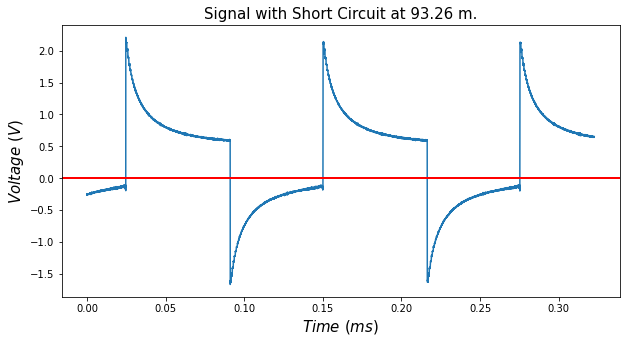

In [65]:
short_93_files_dir = './data/short-circuit/93m'


#load a random file
v_short_93 = ut.random_file_load(short_93_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_93, 'Signal with Short Circuit at 93.26 m.')

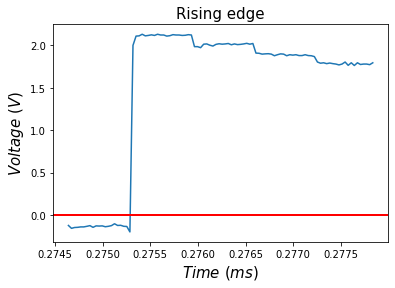

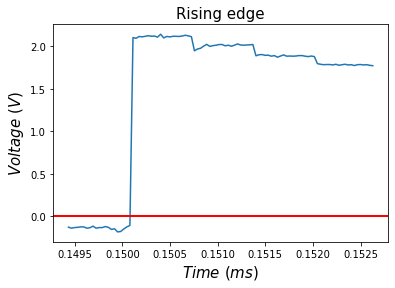

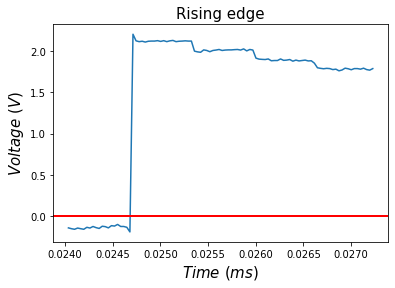

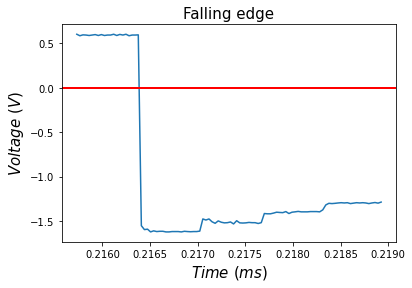

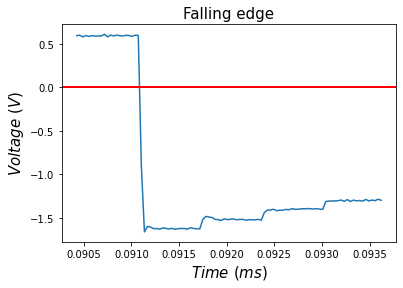

In [66]:
#locate rising and falling edges in the signal
short_93_edges_indices = ut.edges_detection(v_short_93, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_93, t, short_93_edges_indices, win_size, prior_samples)

In [67]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_93_files_dir)

print(sums)

{'./data/short-circuit/93m/short-106-93-1.csv': 2217.369, './data/short-circuit/93m/short-106-93-10.csv': 2969.0359999999996, './data/short-circuit/93m/short-106-93-11.csv': 3424.0730000000003, './data/short-circuit/93m/short-106-93-12.csv': 1714.8709999999996, './data/short-circuit/93m/short-106-93-13.csv': 2687.0150000000003, './data/short-circuit/93m/short-106-93-14.csv': 2315.371, './data/short-circuit/93m/short-106-93-15.csv': 1738.245, './data/short-circuit/93m/short-106-93-16.csv': 3568.5689999999995, './data/short-circuit/93m/short-106-93-17.csv': 2584.7560000000003, './data/short-circuit/93m/short-106-93-18.csv': 3668.4049999999997, './data/short-circuit/93m/short-106-93-19.csv': 1732.3669999999995, './data/short-circuit/93m/short-106-93-2.csv': 2121.4900000000002, './data/short-circuit/93m/short-106-93-20.csv': 1776.1109999999999, './data/short-circuit/93m/short-106-93-21.csv': 3253.685, './data/short-circuit/93m/short-106-93-3.csv': 1618.1240000000003, './data/short-circuit/

### 98.56 m
Short circuit at 98.56 m from the input port

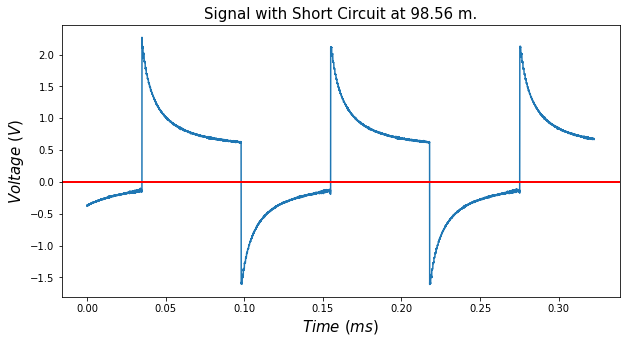

In [68]:
short_99_files_dir = './data/short-circuit/99m'


#load a random file
v_short_99 = ut.random_file_load(short_99_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_99, 'Signal with Short Circuit at 98.56 m.')

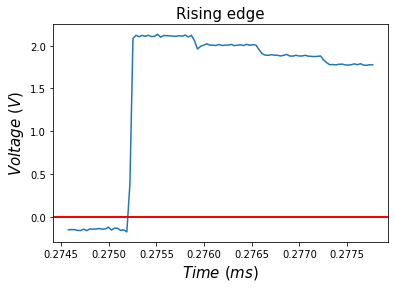

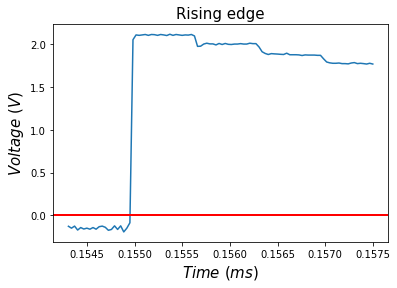

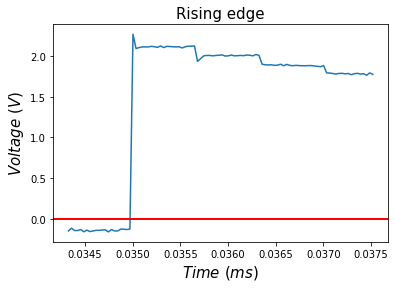

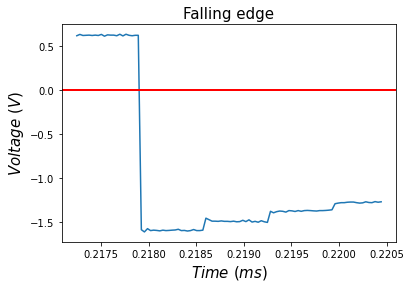

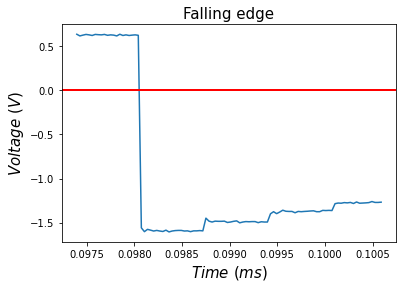

In [69]:
#locate rising and falling edges in the signal
short_99_edges_indices = ut.edges_detection(v_short_99, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising and falling edges
ut.edges_plots(v_short_99, t, short_99_edges_indices, win_size, prior_samples)

In [70]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_99_files_dir)

print(sums)

{'./data/short-circuit/99m/short-106-99-1.csv': 3430.206, './data/short-circuit/99m/short-106-99-10.csv': 2578.8269999999998, './data/short-circuit/99m/short-106-99-11.csv': 2900.723, './data/short-circuit/99m/short-106-99-12.csv': -25041.092, './data/short-circuit/99m/short-106-99-13.csv': 3265.182, './data/short-circuit/99m/short-106-99-14.csv': 3251.289, './data/short-circuit/99m/short-106-99-15.csv': 2478.538, './data/short-circuit/99m/short-106-99-16.csv': 1945.1739999999998, './data/short-circuit/99m/short-106-99-17.csv': 3174.781, './data/short-circuit/99m/short-106-99-18.csv': 3385.8689999999997, './data/short-circuit/99m/short-106-99-19.csv': 1840.6219999999998, './data/short-circuit/99m/short-106-99-2.csv': 3202.622, './data/short-circuit/99m/short-106-99-20.csv': 3428.723, './data/short-circuit/99m/short-106-99-21.csv': 2145.571, './data/short-circuit/99m/short-106-99-3.csv': 2158.749, './data/short-circuit/99m/short-106-99-4.csv': 2360.94, './data/short-circuit/99m/short-10

### 104.26 m
Short circuit at 104.26 m from the input port

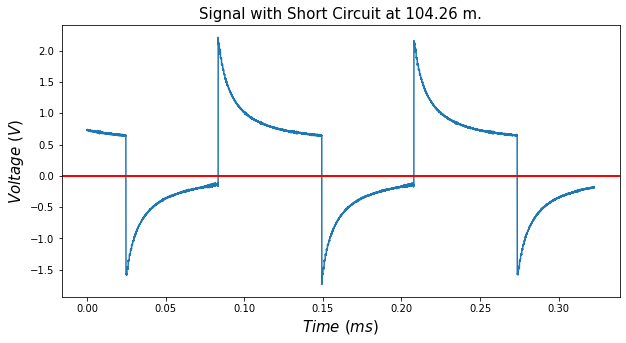

In [71]:
short_104_files_dir = './data/short-circuit/104m'


#load a random file
v_short_104 = ut.random_file_load(short_104_files_dir, num_samples, threshold)


#plot the loaded signal
ut.single_plot(t, v_short_104, 'Signal with Short Circuit at 104.26 m.')

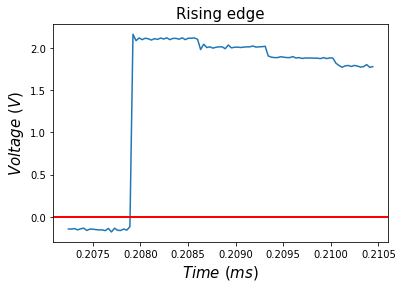

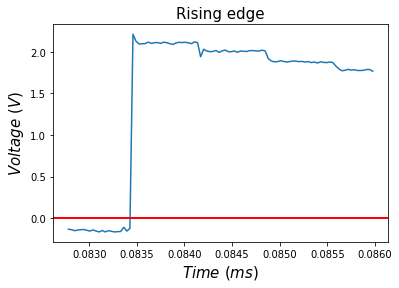

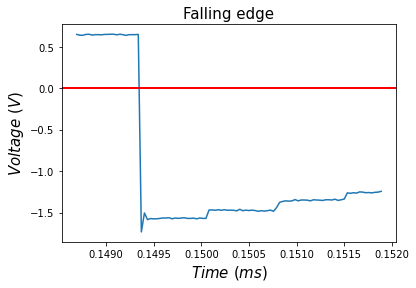

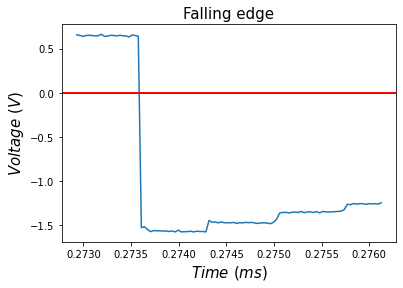

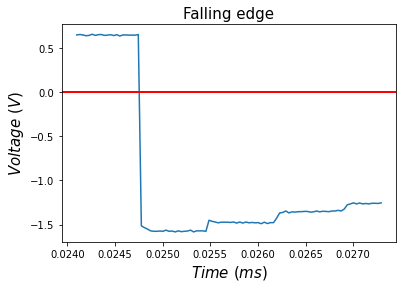

In [72]:
#locate rising and falling edges in the signal
short_104_edges_indices = ut.edges_detection(v_short_104, t, num_edges, win_size, prior_samples, overlap_threshold)


#plot rising an falling edges
ut.edges_plots(v_short_104, t, short_104_edges_indices, win_size, prior_samples)

In [73]:
#print sum of signals' sampled values
sums = ut.signal_sum(short_104_files_dir)

print(sums)

{'./data/short-circuit/104m/short-106-104-1.csv': 2954.387, './data/short-circuit/104m/short-106-104-10.csv': 3276.0009999999997, './data/short-circuit/104m/short-106-104-11.csv': 1916.047, './data/short-circuit/104m/short-106-104-12.csv': -24948.920999999995, './data/short-circuit/104m/short-106-104-13.csv': 2894.1620000000003, './data/short-circuit/104m/short-106-104-14.csv': 3676.8499999999995, './data/short-circuit/104m/short-106-104-15.csv': 2732.213, './data/short-circuit/104m/short-106-104-16.csv': 2668.014, './data/short-circuit/104m/short-106-104-17.csv': 2099.2079999999996, './data/short-circuit/104m/short-106-104-18.csv': 3146.3059999999996, './data/short-circuit/104m/short-106-104-19.csv': 2016.645, './data/short-circuit/104m/short-106-104-2.csv': 3257.138, './data/short-circuit/104m/short-106-104-20.csv': 3516.337, './data/short-circuit/104m/short-106-104-21.csv': 3981.291, './data/short-circuit/104m/short-106-104-22.csv': 2490.431, './data/short-circuit/104m/short-106-104